# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 13005 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    0 of 13005) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 13005) |                     | Elapsed Time: 0:00:25 ETA: 9:18:24

  0% (   26 of 13005) |                     | Elapsed Time: 0:00:25 ETA: 3:36:14

  0% (   41 of 13005) |                     | Elapsed Time: 0:00:26 ETA: 2:18:03

  0% (   57 of 13005) |                     | Elapsed Time: 0:00:26 ETA: 1:39:59

  0% (   73 of 13005) |                     | Elapsed Time: 0:00:26 ETA: 0:02:51

  0% (   89 of 13005) |                     | Elapsed Time: 0:00:26 ETA: 0:02:53

  0% (  105 of 13005) |                     | Elapsed Time: 0:00:27 ETA: 0:02:51

  0% (  121 of 13005) |                     | Elapsed Time: 0:00:27 ETA: 0:02:52

  1% (  138 of 13005) |                     | Elapsed Time: 0:00:27 ETA: 0:02:50

  1% (  155 of 13005) |                     | Elapsed Time: 0:00:27 ETA: 0:02:49

  1% (  172 of 13005) |                     | Elapsed Time: 0:00:27 ETA: 0:02:44

  1% (  190 of 13005) |                     | Elapsed Time: 0:00:28 ETA: 0:02:39

  1% (  208 of 13005) |                     | Elapsed Time: 0:00:28 ETA: 0:02:35

  1% (  226 of 13005) |                     | Elapsed Time: 0:00:28 ETA: 0:02:32

  1% (  244 of 13005) |                     | Elapsed Time: 0:00:28 ETA: 0:02:30

  2% (  261 of 13005) |                     | Elapsed Time: 0:00:28 ETA: 0:02:31

  2% (  279 of 13005) |                     | Elapsed Time: 0:00:29 ETA: 0:02:30

  2% (  297 of 13005) |                     | Elapsed Time: 0:00:29 ETA: 0:02:31

  2% (  315 of 13005) |                     | Elapsed Time: 0:00:29 ETA: 0:02:30

  2% (  334 of 13005) |                     | Elapsed Time: 0:00:29 ETA: 0:02:36

  2% (  350 of 13005) |                     | Elapsed Time: 0:00:30 ETA: 0:02:40

  2% (  366 of 13005) |                     | Elapsed Time: 0:00:30 ETA: 0:02:44

  2% (  382 of 13005) |                     | Elapsed Time: 0:00:30 ETA: 0:02:50

  3% (  398 of 13005) |                     | Elapsed Time: 0:00:30 ETA: 0:02:51

  3% (  414 of 13005) |                     | Elapsed Time: 0:00:30 ETA: 0:02:48

  3% (  430 of 13005) |                     | Elapsed Time: 0:00:31 ETA: 0:02:48

  3% (  446 of 13005) |                     | Elapsed Time: 0:00:31 ETA: 0:02:47

  3% (  462 of 13005) |                     | Elapsed Time: 0:00:31 ETA: 0:02:47

  3% (  478 of 13005) |                     | Elapsed Time: 0:00:31 ETA: 0:02:47

  3% (  496 of 13005) |                     | Elapsed Time: 0:00:32 ETA: 0:02:48

  3% (  512 of 13005) |                     | Elapsed Time: 0:00:32 ETA: 0:02:48

  4% (  527 of 13005) |                     | Elapsed Time: 0:00:32 ETA: 0:02:48

  4% (  543 of 13005) |                     | Elapsed Time: 0:00:32 ETA: 0:02:48

  4% (  559 of 13005) |                     | Elapsed Time: 0:00:32 ETA: 0:02:47

  4% (  575 of 13005) |                     | Elapsed Time: 0:00:33 ETA: 0:02:46

  4% (  591 of 13005) |                     | Elapsed Time: 0:00:33 ETA: 0:02:45

  4% (  607 of 13005) |                     | Elapsed Time: 0:00:33 ETA: 0:02:46

  4% (  623 of 13005) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:46

  4% (  639 of 13005) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:47

  5% (  659 of 13005) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:47

  5% (  675 of 13005) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:47

  5% (  691 of 13005) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:47

  5% (  707 of 13005) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:48

  5% (  724 of 13005) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:45

  5% (  740 of 13005) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:45

  5% (  758 of 13005) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:40

  5% (  776 of 13005) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:35

  6% (  794 of 13005) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:31

  6% (  813 of 13005) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:28

  6% (  830 of 13005) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:26

  6% (  848 of 13005) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:25

  6% (  866 of 13005) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:24

  6% (  884 of 13005) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:22

  6% (  900 of 13005) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:24

  7% (  916 of 13005) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:27

  7% (  932 of 13005) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:31

  7% (  948 of 13005) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:35

  7% (  964 of 13005) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:38

  7% (  984 of 13005) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:37

  7% ( 1000 of 13005) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:35

  7% ( 1016 of 13005) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:34

  7% ( 1040 of 13005) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:33

  8% ( 1056 of 13005) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:32

  8% ( 1073 of 13005) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:31

  8% ( 1091 of 13005) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:27

  8% ( 1109 of 13005) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:23

  8% ( 1127 of 13005) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:21

  8% ( 1144 of 13005) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:25

  8% ( 1161 of 13005) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:27

  9% ( 1178 of 13005) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:30

  9% ( 1195 of 13005) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:32

  9% ( 1209 of 13005) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:40

  9% ( 1226 of 13005) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:32

  9% ( 1235 of 13005) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:31

  9% ( 1245 of 13005) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:52

  9% ( 1261 of 13005) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:56

  9% ( 1279 of 13005) |##                   | Elapsed Time: 0:00:42 ETA: 0:04:39

  9% ( 1294 of 13005) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:47

 10% ( 1309 of 13005) |##                   | Elapsed Time: 0:00:43 ETA: 0:04:39

 10% ( 1325 of 13005) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:32

 10% ( 1341 of 13005) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:33

 10% ( 1357 of 13005) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:38

 10% ( 1373 of 13005) |##                   | Elapsed Time: 0:00:44 ETA: 0:02:37

 10% ( 1389 of 13005) |##                   | Elapsed Time: 0:00:44 ETA: 0:02:39

 10% ( 1405 of 13005) |##                   | Elapsed Time: 0:00:44 ETA: 0:02:40

 10% ( 1421 of 13005) |##                   | Elapsed Time: 0:00:44 ETA: 0:02:40

 11% ( 1439 of 13005) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:34

 11% ( 1455 of 13005) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:31

 11% ( 1472 of 13005) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:34

 11% ( 1489 of 13005) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:31

 11% ( 1506 of 13005) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:29

 11% ( 1524 of 13005) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:27

 11% ( 1542 of 13005) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:22

 11% ( 1560 of 13005) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:17

 12% ( 1578 of 13005) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:17

 12% ( 1596 of 13005) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:17

 12% ( 1613 of 13005) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:21

 12% ( 1635 of 13005) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:21

 12% ( 1653 of 13005) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:21

 12% ( 1670 of 13005) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:22

 12% ( 1686 of 13005) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:22

 13% ( 1703 of 13005) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:22

 13% ( 1721 of 13005) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:21

 13% ( 1739 of 13005) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:19

 13% ( 1757 of 13005) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:16

 13% ( 1775 of 13005) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:11

 13% ( 1796 of 13005) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:15

 13% ( 1814 of 13005) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:16

 14% ( 1829 of 13005) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:22

 14% ( 1847 of 13005) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:23

 14% ( 1863 of 13005) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:24

 14% ( 1879 of 13005) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:24

 14% ( 1897 of 13005) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:19

 14% ( 1913 of 13005) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:22

 14% ( 1931 of 13005) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:19

 15% ( 1951 of 13005) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:15

 15% ( 1967 of 13005) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:15

 15% ( 1982 of 13005) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:22

 15% ( 1999 of 13005) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:18

 15% ( 2015 of 13005) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:22

 15% ( 2030 of 13005) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:26

 15% ( 2046 of 13005) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:25

 15% ( 2062 of 13005) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:23

 15% ( 2078 of 13005) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:26

 16% ( 2094 of 13005) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:24

 16% ( 2114 of 13005) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:25

 16% ( 2130 of 13005) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:24

 16% ( 2146 of 13005) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:24

 16% ( 2162 of 13005) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:23

 16% ( 2178 of 13005) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:24

 16% ( 2194 of 13005) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:24

 16% ( 2210 of 13005) |###                  | Elapsed Time: 0:00:54 ETA: 0:02:24

 17% ( 2226 of 13005) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:24

 17% ( 2242 of 13005) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:23

 17% ( 2258 of 13005) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:23

 17% ( 2276 of 13005) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:23

 17% ( 2292 of 13005) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:22

 17% ( 2308 of 13005) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:22

 17% ( 2324 of 13005) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:21

 17% ( 2340 of 13005) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:21

 18% ( 2356 of 13005) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:22

 18% ( 2374 of 13005) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:18

 18% ( 2390 of 13005) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:18

 18% ( 2407 of 13005) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:16

 18% ( 2424 of 13005) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:15

 18% ( 2448 of 13005) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:11

 18% ( 2466 of 13005) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:09

 19% ( 2484 of 13005) |####                 | Elapsed Time: 0:00:58 ETA: 0:02:08

 19% ( 2502 of 13005) |####                 | Elapsed Time: 0:00:58 ETA: 0:02:08

 19% ( 2520 of 13005) |####                 | Elapsed Time: 0:00:58 ETA: 0:02:08

 19% ( 2538 of 13005) |####                 | Elapsed Time: 0:00:59 ETA: 0:02:07

 19% ( 2556 of 13005) |####                 | Elapsed Time: 0:00:59 ETA: 0:02:07

 19% ( 2574 of 13005) |####                 | Elapsed Time: 0:00:59 ETA: 0:02:05

 19% ( 2592 of 13005) |####                 | Elapsed Time: 0:00:59 ETA: 0:02:05

 20% ( 2610 of 13005) |####                 | Elapsed Time: 0:00:59 ETA: 0:02:05

 20% ( 2628 of 13005) |####                 | Elapsed Time: 0:01:00 ETA: 0:02:04

 20% ( 2646 of 13005) |####                 | Elapsed Time: 0:01:00 ETA: 0:02:04

 20% ( 2664 of 13005) |####                 | Elapsed Time: 0:01:00 ETA: 0:02:03

 20% ( 2682 of 13005) |####                 | Elapsed Time: 0:01:00 ETA: 0:02:03

 20% ( 2700 of 13005) |####                 | Elapsed Time: 0:01:01 ETA: 0:02:01

 20% ( 2716 of 13005) |####                 | Elapsed Time: 0:01:01 ETA: 0:02:04

 21% ( 2732 of 13005) |####                 | Elapsed Time: 0:01:01 ETA: 0:02:08

 21% ( 2748 of 13005) |####                 | Elapsed Time: 0:01:01 ETA: 0:02:11

 21% ( 2764 of 13005) |####                 | Elapsed Time: 0:01:01 ETA: 0:02:15

 21% ( 2781 of 13005) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:17

 21% ( 2799 of 13005) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:11

 21% ( 2816 of 13005) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:07

 21% ( 2832 of 13005) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:06

 21% ( 2848 of 13005) |####                 | Elapsed Time: 0:01:02 ETA: 0:02:06

 22% ( 2864 of 13005) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:10

 22% ( 2882 of 13005) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:11

 22% ( 2900 of 13005) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:09

 22% ( 2918 of 13005) |####                 | Elapsed Time: 0:01:03 ETA: 0:02:05

 22% ( 2936 of 13005) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:00

 22% ( 2953 of 13005) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:00

 22% ( 2970 of 13005) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:02

 22% ( 2987 of 13005) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:03

 23% ( 3005 of 13005) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:02

 23% ( 3022 of 13005) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:03

 23% ( 3039 of 13005) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:02

 23% ( 3056 of 13005) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:02

 23% ( 3073 of 13005) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:04

 23% ( 3098 of 13005) |#####                | Elapsed Time: 0:01:06 ETA: 0:02:03

 23% ( 3116 of 13005) |#####                | Elapsed Time: 0:01:06 ETA: 0:02:02

 24% ( 3133 of 13005) |#####                | Elapsed Time: 0:01:06 ETA: 0:02:02

 24% ( 3151 of 13005) |#####                | Elapsed Time: 0:01:06 ETA: 0:02:01

 24% ( 3169 of 13005) |#####                | Elapsed Time: 0:01:06 ETA: 0:01:57

 24% ( 3187 of 13005) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:56

 24% ( 3204 of 13005) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:57

 24% ( 3221 of 13005) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:56

 24% ( 3239 of 13005) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:55

 25% ( 3261 of 13005) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:54

 25% ( 3276 of 13005) |#####                | Elapsed Time: 0:01:08 ETA: 0:01:58

 25% ( 3294 of 13005) |#####                | Elapsed Time: 0:01:08 ETA: 0:01:55

 25% ( 3312 of 13005) |#####                | Elapsed Time: 0:01:08 ETA: 0:01:56

 25% ( 3330 of 13005) |#####                | Elapsed Time: 0:01:08 ETA: 0:01:56

 25% ( 3347 of 13005) |#####                | Elapsed Time: 0:01:09 ETA: 0:01:58

 25% ( 3364 of 13005) |#####                | Elapsed Time: 0:01:09 ETA: 0:01:55

 25% ( 3380 of 13005) |#####                | Elapsed Time: 0:01:09 ETA: 0:01:58

 26% ( 3395 of 13005) |#####                | Elapsed Time: 0:01:09 ETA: 0:02:02

 26% ( 3414 of 13005) |#####                | Elapsed Time: 0:01:09 ETA: 0:02:03

 26% ( 3432 of 13005) |#####                | Elapsed Time: 0:01:10 ETA: 0:02:01

 26% ( 3450 of 13005) |#####                | Elapsed Time: 0:01:10 ETA: 0:02:01

 26% ( 3468 of 13005) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:59

 26% ( 3485 of 13005) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:58

 26% ( 3502 of 13005) |#####                | Elapsed Time: 0:01:10 ETA: 0:01:59

 27% ( 3519 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:59

 27% ( 3533 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:02

 27% ( 3549 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:04

 27% ( 3567 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:02:02

 27% ( 3586 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:02:00

 27% ( 3603 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:59

 27% ( 3621 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:53

 27% ( 3639 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:52

 28% ( 3656 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:53

 28% ( 3674 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:52

 28% ( 3692 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:52

 28% ( 3710 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:52

 28% ( 3727 of 13005) |######               | Elapsed Time: 0:01:13 ETA: 0:01:51

 28% ( 3747 of 13005) |######               | Elapsed Time: 0:01:14 ETA: 0:01:53

 28% ( 3763 of 13005) |######               | Elapsed Time: 0:01:14 ETA: 0:01:56

 29% ( 3779 of 13005) |######               | Elapsed Time: 0:01:14 ETA: 0:01:59

 29% ( 3796 of 13005) |######               | Elapsed Time: 0:01:14 ETA: 0:02:00

 29% ( 3812 of 13005) |######               | Elapsed Time: 0:01:14 ETA: 0:01:59

 29% ( 3826 of 13005) |######               | Elapsed Time: 0:01:15 ETA: 0:02:02

 29% ( 3843 of 13005) |######               | Elapsed Time: 0:01:15 ETA: 0:02:00

 29% ( 3861 of 13005) |######               | Elapsed Time: 0:01:15 ETA: 0:01:57

 29% ( 3879 of 13005) |######               | Elapsed Time: 0:01:15 ETA: 0:01:54

 30% ( 3902 of 13005) |######               | Elapsed Time: 0:01:15 ETA: 0:01:51

 30% ( 3919 of 13005) |######               | Elapsed Time: 0:01:16 ETA: 0:01:48

 30% ( 3936 of 13005) |######               | Elapsed Time: 0:01:16 ETA: 0:01:49

 30% ( 3954 of 13005) |######               | Elapsed Time: 0:01:16 ETA: 0:01:48

 30% ( 3972 of 13005) |######               | Elapsed Time: 0:01:16 ETA: 0:01:48

 30% ( 3989 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:48

 30% ( 4006 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:47

 30% ( 4022 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:49

 31% ( 4040 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:49

 31% ( 4065 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:47

 31% ( 4083 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:47

 31% ( 4100 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:47

 31% ( 4116 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:47

 31% ( 4132 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:51

 31% ( 4148 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:52

 32% ( 4164 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:54

 32% ( 4181 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:53

 32% ( 4199 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:49

 32% ( 4217 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:46

 32% ( 4236 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:44

 32% ( 4254 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:43

 32% ( 4271 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:43

 32% ( 4289 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:42

 33% ( 4307 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:44

 33% ( 4325 of 13005) |######               | Elapsed Time: 0:01:21 ETA: 0:01:44

 33% ( 4343 of 13005) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:44

 33% ( 4360 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:03:33

 33% ( 4376 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:03:38

 33% ( 4398 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:03:32

 33% ( 4415 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:03:34

 34% ( 4431 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:50

 34% ( 4447 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:51

 34% ( 4463 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:51

 34% ( 4479 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:52

 34% ( 4496 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:52

 34% ( 4513 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:51

 34% ( 4530 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:47

 35% ( 4552 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:46

 35% ( 4570 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:45

 35% ( 4588 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:42

 35% ( 4606 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:42

 35% ( 4624 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:41

 35% ( 4642 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:40

 35% ( 4659 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:39

 35% ( 4677 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:38

 36% ( 4695 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:37

 36% ( 4715 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:35

 36% ( 4733 of 13005) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:35

 36% ( 4751 of 13005) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:33

 36% ( 4768 of 13005) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:34

 36% ( 4785 of 13005) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:35

 36% ( 4801 of 13005) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:38

 37% ( 4817 of 13005) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:41

 37% ( 4835 of 13005) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:41

 37% ( 4853 of 13005) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:41

 37% ( 4877 of 13005) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:38

 37% ( 4895 of 13005) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:36

 37% ( 4912 of 13005) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:37

 37% ( 4930 of 13005) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:37

 38% ( 4947 of 13005) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:38

 38% ( 4965 of 13005) |########             | Elapsed Time: 0:01:29 ETA: 0:01:37

 38% ( 4983 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:36

 38% ( 5001 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:34

 38% ( 5017 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:36

 38% ( 5040 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:35

 38% ( 5058 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:35

 39% ( 5074 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:37

 39% ( 5090 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:38

 39% ( 5106 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:39

 39% ( 5124 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:39

 39% ( 5140 of 13005) |########             | Elapsed Time: 0:01:32 ETA: 0:01:40

 39% ( 5158 of 13005) |########             | Elapsed Time: 0:01:32 ETA: 0:01:38

 39% ( 5175 of 13005) |########             | Elapsed Time: 0:01:32 ETA: 0:01:37

 39% ( 5193 of 13005) |########             | Elapsed Time: 0:01:32 ETA: 0:01:35

 40% ( 5210 of 13005) |########             | Elapsed Time: 0:01:32 ETA: 0:01:37

 40% ( 5227 of 13005) |########             | Elapsed Time: 0:01:33 ETA: 0:01:35

 40% ( 5245 of 13005) |########             | Elapsed Time: 0:01:33 ETA: 0:01:33

 40% ( 5261 of 13005) |########             | Elapsed Time: 0:01:33 ETA: 0:01:35

 40% ( 5277 of 13005) |########             | Elapsed Time: 0:01:33 ETA: 0:01:36

 40% ( 5294 of 13005) |########             | Elapsed Time: 0:01:34 ETA: 0:01:35

 40% ( 5312 of 13005) |########             | Elapsed Time: 0:01:34 ETA: 0:01:36

 40% ( 5330 of 13005) |########             | Elapsed Time: 0:01:34 ETA: 0:01:34

 41% ( 5346 of 13005) |########             | Elapsed Time: 0:01:34 ETA: 0:01:34

 41% ( 5365 of 13005) |########             | Elapsed Time: 0:01:34 ETA: 0:01:33

 41% ( 5383 of 13005) |########             | Elapsed Time: 0:01:35 ETA: 0:01:31

 41% ( 5399 of 13005) |########             | Elapsed Time: 0:01:35 ETA: 0:01:34

 41% ( 5416 of 13005) |########             | Elapsed Time: 0:01:35 ETA: 0:01:33

 41% ( 5434 of 13005) |########             | Elapsed Time: 0:01:35 ETA: 0:01:31

 41% ( 5451 of 13005) |########             | Elapsed Time: 0:01:35 ETA: 0:01:32

 42% ( 5468 of 13005) |########             | Elapsed Time: 0:01:36 ETA: 0:01:33

 42% ( 5487 of 13005) |########             | Elapsed Time: 0:01:36 ETA: 0:01:29

 42% ( 5504 of 13005) |########             | Elapsed Time: 0:01:36 ETA: 0:01:30

 42% ( 5519 of 13005) |########             | Elapsed Time: 0:01:36 ETA: 0:01:33

 42% ( 5537 of 13005) |########             | Elapsed Time: 0:01:37 ETA: 0:01:36

 42% ( 5555 of 13005) |########             | Elapsed Time: 0:01:37 ETA: 0:01:34

 42% ( 5573 of 13005) |########             | Elapsed Time: 0:01:37 ETA: 0:01:35

 42% ( 5591 of 13005) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:31

 43% ( 5608 of 13005) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:29

 43% ( 5622 of 13005) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:32

 43% ( 5638 of 13005) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:35

 43% ( 5653 of 13005) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:39

 43% ( 5671 of 13005) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:39

 43% ( 5690 of 13005) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:37

 43% ( 5707 of 13005) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:35

 44% ( 5724 of 13005) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:32

 44% ( 5741 of 13005) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:32

 44% ( 5759 of 13005) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:31

 44% ( 5775 of 13005) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:30

 44% ( 5790 of 13005) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:33

 44% ( 5806 of 13005) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:34

 44% ( 5822 of 13005) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:36

 44% ( 5838 of 13005) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:36

 45% ( 5862 of 13005) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:31

 45% ( 5880 of 13005) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:28

 45% ( 5898 of 13005) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:25

 45% ( 5916 of 13005) |#########            | Elapsed Time: 0:01:41 ETA: 0:01:23

 45% ( 5934 of 13005) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:22

 45% ( 5952 of 13005) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:22

 45% ( 5970 of 13005) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:21

 46% ( 5989 of 13005) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:21

 46% ( 6006 of 13005) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:23

 46% ( 6024 of 13005) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:24

 46% ( 6042 of 13005) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:24

 46% ( 6056 of 13005) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:29

 46% ( 6073 of 13005) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:30

 46% ( 6091 of 13005) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:27

 46% ( 6108 of 13005) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:26

 47% ( 6125 of 13005) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:26

 47% ( 6143 of 13005) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:22

 47% ( 6159 of 13005) |#########            | Elapsed Time: 0:01:44 ETA: 0:01:24

 47% ( 6178 of 13005) |#########            | Elapsed Time: 0:01:45 ETA: 0:01:23

 47% ( 6196 of 13005) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:22

 47% ( 6213 of 13005) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:22

 47% ( 6231 of 13005) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:22

 48% ( 6248 of 13005) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:21

 48% ( 6265 of 13005) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:22

 48% ( 6281 of 13005) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:23

 48% ( 6299 of 13005) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:23

 48% ( 6316 of 13005) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:23

 48% ( 6332 of 13005) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:25

 48% ( 6348 of 13005) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:24

 48% ( 6365 of 13005) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:23

 49% ( 6383 of 13005) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:22

 49% ( 6398 of 13005) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:23

 49% ( 6414 of 13005) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:24

 49% ( 6430 of 13005) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:24

 49% ( 6448 of 13005) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:23

 49% ( 6466 of 13005) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:21

 49% ( 6483 of 13005) |##########           | Elapsed Time: 0:01:48 ETA: 0:01:19

 50% ( 6503 of 13005) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:17

 50% ( 6521 of 13005) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:16

 50% ( 6539 of 13005) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:16

 50% ( 6557 of 13005) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:16

 50% ( 6575 of 13005) |##########           | Elapsed Time: 0:01:49 ETA: 0:01:15

 50% ( 6593 of 13005) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:15

 50% ( 6611 of 13005) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:15

 50% ( 6627 of 13005) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:17

 51% ( 6643 of 13005) |##########           | Elapsed Time: 0:01:50 ETA: 0:01:18

 51% ( 6666 of 13005) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:18

 51% ( 6684 of 13005) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:17

 51% ( 6702 of 13005) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:17

 51% ( 6720 of 13005) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:14

 51% ( 6738 of 13005) |##########           | Elapsed Time: 0:01:51 ETA: 0:01:12

 51% ( 6755 of 13005) |##########           | Elapsed Time: 0:01:52 ETA: 0:01:13

 52% ( 6772 of 13005) |##########           | Elapsed Time: 0:01:52 ETA: 0:01:14

 52% ( 6786 of 13005) |##########           | Elapsed Time: 0:01:52 ETA: 0:01:18

 52% ( 6800 of 13005) |##########           | Elapsed Time: 0:01:52 ETA: 0:01:21

 52% ( 6814 of 13005) |###########          | Elapsed Time: 0:01:52 ETA: 0:01:24

 52% ( 6836 of 13005) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:26

 52% ( 6854 of 13005) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:24

 52% ( 6870 of 13005) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:22

 52% ( 6888 of 13005) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:19

 53% ( 6904 of 13005) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:17

 53% ( 6920 of 13005) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:17

 53% ( 6937 of 13005) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:16

 53% ( 6954 of 13005) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:15

 53% ( 6972 of 13005) |###########          | Elapsed Time: 0:01:54 ETA: 0:01:14

 53% ( 6991 of 13005) |###########          | Elapsed Time: 0:01:55 ETA: 0:01:11

 53% ( 7009 of 13005) |###########          | Elapsed Time: 0:01:55 ETA: 0:01:10

 54% ( 7025 of 13005) |###########          | Elapsed Time: 0:01:55 ETA: 0:01:11

 54% ( 7041 of 13005) |###########          | Elapsed Time: 0:01:55 ETA: 0:01:13

 54% ( 7058 of 13005) |###########          | Elapsed Time: 0:01:55 ETA: 0:01:13

 54% ( 7076 of 13005) |###########          | Elapsed Time: 0:01:56 ETA: 0:01:14

 54% ( 7094 of 13005) |###########          | Elapsed Time: 0:01:56 ETA: 0:01:13

 54% ( 7112 of 13005) |###########          | Elapsed Time: 0:01:56 ETA: 0:01:11

 54% ( 7128 of 13005) |###########          | Elapsed Time: 0:01:56 ETA: 0:01:11

 54% ( 7144 of 13005) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:13

 55% ( 7161 of 13005) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:14

 55% ( 7178 of 13005) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:13

 55% ( 7196 of 13005) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:13

 55% ( 7214 of 13005) |###########          | Elapsed Time: 0:01:57 ETA: 0:01:11

 55% ( 7232 of 13005) |###########          | Elapsed Time: 0:01:58 ETA: 0:01:09

 55% ( 7250 of 13005) |###########          | Elapsed Time: 0:01:58 ETA: 0:01:08

 55% ( 7267 of 13005) |###########          | Elapsed Time: 0:01:58 ETA: 0:01:10

 55% ( 7282 of 13005) |###########          | Elapsed Time: 0:01:58 ETA: 0:01:12

 56% ( 7300 of 13005) |###########          | Elapsed Time: 0:01:58 ETA: 0:01:11

 56% ( 7325 of 13005) |###########          | Elapsed Time: 0:01:59 ETA: 0:01:11

 56% ( 7342 of 13005) |###########          | Elapsed Time: 0:01:59 ETA: 0:01:11

 56% ( 7359 of 13005) |###########          | Elapsed Time: 0:01:59 ETA: 0:01:11

 56% ( 7377 of 13005) |###########          | Elapsed Time: 0:01:59 ETA: 0:01:09

 56% ( 7394 of 13005) |###########          | Elapsed Time: 0:02:00 ETA: 0:01:09

 57% ( 7413 of 13005) |###########          | Elapsed Time: 0:02:00 ETA: 0:01:07

 57% ( 7431 of 13005) |###########          | Elapsed Time: 0:02:00 ETA: 0:01:06

 57% ( 7449 of 13005) |############         | Elapsed Time: 0:02:00 ETA: 0:01:06

 57% ( 7464 of 13005) |############         | Elapsed Time: 0:02:00 ETA: 0:01:07

 57% ( 7486 of 13005) |############         | Elapsed Time: 0:02:01 ETA: 0:01:08

 57% ( 7500 of 13005) |############         | Elapsed Time: 0:02:01 ETA: 0:01:11

 57% ( 7514 of 13005) |############         | Elapsed Time: 0:02:01 ETA: 0:01:14

 57% ( 7531 of 13005) |############         | Elapsed Time: 0:02:01 ETA: 0:01:14

 58% ( 7548 of 13005) |############         | Elapsed Time: 0:02:02 ETA: 0:01:13

 58% ( 7565 of 13005) |############         | Elapsed Time: 0:02:02 ETA: 0:01:11

 58% ( 7583 of 13005) |############         | Elapsed Time: 0:02:02 ETA: 0:01:08

 58% ( 7601 of 13005) |############         | Elapsed Time: 0:02:02 ETA: 0:01:06

 58% ( 7619 of 13005) |############         | Elapsed Time: 0:02:02 ETA: 0:01:05

 58% ( 7641 of 13005) |############         | Elapsed Time: 0:02:03 ETA: 0:01:03

 58% ( 7658 of 13005) |############         | Elapsed Time: 0:02:03 ETA: 0:01:03

 59% ( 7674 of 13005) |############         | Elapsed Time: 0:02:03 ETA: 0:01:03

 59% ( 7691 of 13005) |############         | Elapsed Time: 0:02:03 ETA: 0:01:05

 59% ( 7709 of 13005) |############         | Elapsed Time: 0:02:04 ETA: 0:01:04

 59% ( 7727 of 13005) |############         | Elapsed Time: 0:02:04 ETA: 0:01:05

 59% ( 7745 of 13005) |############         | Elapsed Time: 0:02:04 ETA: 0:01:04

 59% ( 7761 of 13005) |############         | Elapsed Time: 0:02:04 ETA: 0:01:04

 59% ( 7779 of 13005) |############         | Elapsed Time: 0:02:04 ETA: 0:01:04

 60% ( 7803 of 13005) |############         | Elapsed Time: 0:02:05 ETA: 0:01:03

 60% ( 7820 of 13005) |############         | Elapsed Time: 0:02:05 ETA: 0:01:03

 60% ( 7837 of 13005) |############         | Elapsed Time: 0:02:05 ETA: 0:01:03

 60% ( 7854 of 13005) |############         | Elapsed Time: 0:02:05 ETA: 0:01:03

 60% ( 7871 of 13005) |############         | Elapsed Time: 0:02:06 ETA: 0:01:03

 60% ( 7889 of 13005) |############         | Elapsed Time: 0:02:06 ETA: 0:01:04

 60% ( 7904 of 13005) |############         | Elapsed Time: 0:02:06 ETA: 0:01:06

 60% ( 7922 of 13005) |############         | Elapsed Time: 0:02:06 ETA: 0:01:03

 61% ( 7940 of 13005) |############         | Elapsed Time: 0:02:06 ETA: 0:01:02

 61% ( 7957 of 13005) |############         | Elapsed Time: 0:02:07 ETA: 0:01:02

 61% ( 7975 of 13005) |############         | Elapsed Time: 0:02:07 ETA: 0:01:01

 61% ( 7993 of 13005) |############         | Elapsed Time: 0:02:07 ETA: 0:01:00

 61% ( 8010 of 13005) |############         | Elapsed Time: 0:02:07 ETA: 0:01:00

 61% ( 8027 of 13005) |############         | Elapsed Time: 0:02:07 ETA: 0:01:01

 61% ( 8044 of 13005) |############         | Elapsed Time: 0:02:08 ETA: 0:01:00

 61% ( 8062 of 13005) |#############        | Elapsed Time: 0:02:08 ETA: 0:01:00

 62% ( 8080 of 13005) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:59

 62% ( 8098 of 13005) |#############        | Elapsed Time: 0:02:08 ETA: 0:00:58

 62% ( 8116 of 13005) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:57

 62% ( 8136 of 13005) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:58

 62% ( 8153 of 13005) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:59

 62% ( 8171 of 13005) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:59

 62% ( 8189 of 13005) |#############        | Elapsed Time: 0:02:09 ETA: 0:00:59

 63% ( 8205 of 13005) |#############        | Elapsed Time: 0:02:10 ETA: 0:01:00

 63% ( 8214 of 13005) |#############        | Elapsed Time: 0:02:11 ETA: 0:02:25

 63% ( 8230 of 13005) |#############        | Elapsed Time: 0:02:11 ETA: 0:02:28

 63% ( 8246 of 13005) |#############        | Elapsed Time: 0:02:11 ETA: 0:02:31

 63% ( 8264 of 13005) |#############        | Elapsed Time: 0:02:12 ETA: 0:02:29

 63% ( 8281 of 13005) |#############        | Elapsed Time: 0:02:12 ETA: 0:00:59

 63% ( 8298 of 13005) |#############        | Elapsed Time: 0:02:12 ETA: 0:01:02

 63% ( 8313 of 13005) |#############        | Elapsed Time: 0:02:12 ETA: 0:01:01

 64% ( 8331 of 13005) |#############        | Elapsed Time: 0:02:13 ETA: 0:01:01

 64% ( 8349 of 13005) |#############        | Elapsed Time: 0:02:13 ETA: 0:01:01

 64% ( 8365 of 13005) |#############        | Elapsed Time: 0:02:13 ETA: 0:01:00

 64% ( 8381 of 13005) |#############        | Elapsed Time: 0:02:13 ETA: 0:00:57

 64% ( 8399 of 13005) |#############        | Elapsed Time: 0:02:13 ETA: 0:00:57

 64% ( 8416 of 13005) |#############        | Elapsed Time: 0:02:14 ETA: 0:00:57

 64% ( 8433 of 13005) |#############        | Elapsed Time: 0:02:14 ETA: 0:00:57

 65% ( 8454 of 13005) |#############        | Elapsed Time: 0:02:14 ETA: 0:00:56

 65% ( 8472 of 13005) |#############        | Elapsed Time: 0:02:14 ETA: 0:00:55

 65% ( 8490 of 13005) |#############        | Elapsed Time: 0:02:14 ETA: 0:00:54

 65% ( 8507 of 13005) |#############        | Elapsed Time: 0:02:15 ETA: 0:00:54

 65% ( 8524 of 13005) |#############        | Elapsed Time: 0:02:15 ETA: 0:00:54

 65% ( 8540 of 13005) |#############        | Elapsed Time: 0:02:15 ETA: 0:00:55

 65% ( 8558 of 13005) |#############        | Elapsed Time: 0:02:15 ETA: 0:00:55

 65% ( 8575 of 13005) |#############        | Elapsed Time: 0:02:16 ETA: 0:00:56

 66% ( 8593 of 13005) |#############        | Elapsed Time: 0:02:16 ETA: 0:00:54

 66% ( 8616 of 13005) |#############        | Elapsed Time: 0:02:16 ETA: 0:00:53

 66% ( 8633 of 13005) |#############        | Elapsed Time: 0:02:16 ETA: 0:00:53

 66% ( 8650 of 13005) |#############        | Elapsed Time: 0:02:16 ETA: 0:00:53

 66% ( 8667 of 13005) |#############        | Elapsed Time: 0:02:17 ETA: 0:00:53

 66% ( 8683 of 13005) |##############       | Elapsed Time: 0:02:17 ETA: 0:00:53

 66% ( 8700 of 13005) |##############       | Elapsed Time: 0:02:17 ETA: 0:00:54

 67% ( 8717 of 13005) |##############       | Elapsed Time: 0:02:17 ETA: 0:00:53

 67% ( 8734 of 13005) |##############       | Elapsed Time: 0:02:18 ETA: 0:00:53

 67% ( 8752 of 13005) |##############       | Elapsed Time: 0:02:18 ETA: 0:00:52

 67% ( 8770 of 13005) |##############       | Elapsed Time: 0:02:18 ETA: 0:00:51

 67% ( 8788 of 13005) |##############       | Elapsed Time: 0:02:18 ETA: 0:00:50

 67% ( 8806 of 13005) |##############       | Elapsed Time: 0:02:18 ETA: 0:00:50

 67% ( 8824 of 13005) |##############       | Elapsed Time: 0:02:19 ETA: 0:00:49

 67% ( 8840 of 13005) |##############       | Elapsed Time: 0:02:19 ETA: 0:00:50

 68% ( 8857 of 13005) |##############       | Elapsed Time: 0:02:19 ETA: 0:00:50

 68% ( 8873 of 13005) |##############       | Elapsed Time: 0:02:19 ETA: 0:00:52

 68% ( 8890 of 13005) |##############       | Elapsed Time: 0:02:19 ETA: 0:00:52

 68% ( 8907 of 13005) |##############       | Elapsed Time: 0:02:20 ETA: 0:00:52

 68% ( 8924 of 13005) |##############       | Elapsed Time: 0:02:20 ETA: 0:00:51

 68% ( 8941 of 13005) |##############       | Elapsed Time: 0:02:20 ETA: 0:00:51

 68% ( 8959 of 13005) |##############       | Elapsed Time: 0:02:20 ETA: 0:00:49

 69% ( 8977 of 13005) |##############       | Elapsed Time: 0:02:21 ETA: 0:00:49

 69% ( 8995 of 13005) |##############       | Elapsed Time: 0:02:21 ETA: 0:00:49

 69% ( 9013 of 13005) |##############       | Elapsed Time: 0:02:21 ETA: 0:00:48

 69% ( 9031 of 13005) |##############       | Elapsed Time: 0:02:21 ETA: 0:00:47

 69% ( 9049 of 13005) |##############       | Elapsed Time: 0:02:21 ETA: 0:00:46

 69% ( 9067 of 13005) |##############       | Elapsed Time: 0:02:22 ETA: 0:00:46

 69% ( 9082 of 13005) |##############       | Elapsed Time: 0:02:22 ETA: 0:00:47

 70% ( 9104 of 13005) |##############       | Elapsed Time: 0:02:22 ETA: 0:00:48

 70% ( 9122 of 13005) |##############       | Elapsed Time: 0:02:22 ETA: 0:00:48

 70% ( 9140 of 13005) |##############       | Elapsed Time: 0:02:23 ETA: 0:00:49

 70% ( 9165 of 13005) |##############       | Elapsed Time: 0:02:23 ETA: 0:00:47

 70% ( 9181 of 13005) |##############       | Elapsed Time: 0:02:23 ETA: 0:00:46

 70% ( 9198 of 13005) |##############       | Elapsed Time: 0:02:23 ETA: 0:00:46

 70% ( 9216 of 13005) |##############       | Elapsed Time: 0:02:23 ETA: 0:00:45

 71% ( 9234 of 13005) |##############       | Elapsed Time: 0:02:24 ETA: 0:00:45

 71% ( 9252 of 13005) |##############       | Elapsed Time: 0:02:24 ETA: 0:00:44

 71% ( 9277 of 13005) |##############       | Elapsed Time: 0:02:24 ETA: 0:00:43

 71% ( 9295 of 13005) |###############      | Elapsed Time: 0:02:24 ETA: 0:00:43

 71% ( 9313 of 13005) |###############      | Elapsed Time: 0:02:25 ETA: 0:00:44

 71% ( 9331 of 13005) |###############      | Elapsed Time: 0:02:25 ETA: 0:00:44

 71% ( 9348 of 13005) |###############      | Elapsed Time: 0:02:25 ETA: 0:00:44

 72% ( 9366 of 13005) |###############      | Elapsed Time: 0:02:25 ETA: 0:00:44

 72% ( 9383 of 13005) |###############      | Elapsed Time: 0:02:25 ETA: 0:00:44

 72% ( 9401 of 13005) |###############      | Elapsed Time: 0:02:26 ETA: 0:00:43

 72% ( 9418 of 13005) |###############      | Elapsed Time: 0:02:26 ETA: 0:00:43

 72% ( 9438 of 13005) |###############      | Elapsed Time: 0:02:26 ETA: 0:00:42

 72% ( 9454 of 13005) |###############      | Elapsed Time: 0:02:26 ETA: 0:00:43

 72% ( 9468 of 13005) |###############      | Elapsed Time: 0:02:27 ETA: 0:00:46

 72% ( 9482 of 13005) |###############      | Elapsed Time: 0:02:27 ETA: 0:00:48

 73% ( 9500 of 13005) |###############      | Elapsed Time: 0:02:27 ETA: 0:00:47

 73% ( 9517 of 13005) |###############      | Elapsed Time: 0:02:27 ETA: 0:00:48

 73% ( 9536 of 13005) |###############      | Elapsed Time: 0:02:27 ETA: 0:00:44

 73% ( 9554 of 13005) |###############      | Elapsed Time: 0:02:28 ETA: 0:00:41

 73% ( 9572 of 13005) |###############      | Elapsed Time: 0:02:28 ETA: 0:00:40

 73% ( 9592 of 13005) |###############      | Elapsed Time: 0:02:28 ETA: 0:00:40

 73% ( 9610 of 13005) |###############      | Elapsed Time: 0:02:28 ETA: 0:00:40

 74% ( 9627 of 13005) |###############      | Elapsed Time: 0:02:29 ETA: 0:00:40

 74% ( 9644 of 13005) |###############      | Elapsed Time: 0:02:29 ETA: 0:00:41

 74% ( 9662 of 13005) |###############      | Elapsed Time: 0:02:29 ETA: 0:00:41

 74% ( 9678 of 13005) |###############      | Elapsed Time: 0:02:29 ETA: 0:00:41

 74% ( 9695 of 13005) |###############      | Elapsed Time: 0:02:29 ETA: 0:00:41

 74% ( 9712 of 13005) |###############      | Elapsed Time: 0:02:30 ETA: 0:00:41

 74% ( 9729 of 13005) |###############      | Elapsed Time: 0:02:30 ETA: 0:00:41

 74% ( 9746 of 13005) |###############      | Elapsed Time: 0:02:30 ETA: 0:00:40

 75% ( 9762 of 13005) |###############      | Elapsed Time: 0:02:30 ETA: 0:00:40

 75% ( 9779 of 13005) |###############      | Elapsed Time: 0:02:30 ETA: 0:00:40

 75% ( 9795 of 13005) |###############      | Elapsed Time: 0:02:31 ETA: 0:00:40

 75% ( 9813 of 13005) |###############      | Elapsed Time: 0:02:31 ETA: 0:00:40

 75% ( 9830 of 13005) |###############      | Elapsed Time: 0:02:31 ETA: 0:00:39

 75% ( 9848 of 13005) |###############      | Elapsed Time: 0:02:31 ETA: 0:00:38

 75% ( 9864 of 13005) |###############      | Elapsed Time: 0:02:31 ETA: 0:00:39

 75% ( 9881 of 13005) |###############      | Elapsed Time: 0:02:32 ETA: 0:00:39

 76% ( 9899 of 13005) |###############      | Elapsed Time: 0:02:32 ETA: 0:00:38

 76% ( 9917 of 13005) |################     | Elapsed Time: 0:02:32 ETA: 0:00:37

 76% ( 9936 of 13005) |################     | Elapsed Time: 0:02:32 ETA: 0:00:36

 76% ( 9953 of 13005) |################     | Elapsed Time: 0:02:33 ETA: 0:00:35

 76% ( 9971 of 13005) |################     | Elapsed Time: 0:02:33 ETA: 0:00:36

 76% ( 9989 of 13005) |################     | Elapsed Time: 0:02:33 ETA: 0:00:36

 76% (10005 of 13005) |################     | Elapsed Time: 0:02:33 ETA: 0:00:37

 77% (10021 of 13005) |################     | Elapsed Time: 0:02:33 ETA: 0:00:37

 77% (10037 of 13005) |################     | Elapsed Time: 0:02:34 ETA: 0:00:38

 77% (10054 of 13005) |################     | Elapsed Time: 0:02:34 ETA: 0:00:38

 77% (10079 of 13005) |################     | Elapsed Time: 0:02:34 ETA: 0:00:37

 77% (10096 of 13005) |################     | Elapsed Time: 0:02:34 ETA: 0:00:37

 77% (10113 of 13005) |################     | Elapsed Time: 0:02:35 ETA: 0:00:36

 77% (10131 of 13005) |################     | Elapsed Time: 0:02:35 ETA: 0:00:34

 78% (10149 of 13005) |################     | Elapsed Time: 0:02:35 ETA: 0:00:34

 78% (10167 of 13005) |################     | Elapsed Time: 0:02:35 ETA: 0:00:34

 78% (10185 of 13005) |################     | Elapsed Time: 0:02:35 ETA: 0:00:33

 78% (10203 of 13005) |################     | Elapsed Time: 0:02:36 ETA: 0:00:33

 78% (10221 of 13005) |################     | Elapsed Time: 0:02:36 ETA: 0:00:33

 78% (10242 of 13005) |################     | Elapsed Time: 0:02:36 ETA: 0:00:33

 78% (10259 of 13005) |################     | Elapsed Time: 0:02:36 ETA: 0:00:33

 79% (10277 of 13005) |################     | Elapsed Time: 0:02:37 ETA: 0:00:33

 79% (10295 of 13005) |################     | Elapsed Time: 0:02:37 ETA: 0:00:33

 79% (10313 of 13005) |################     | Elapsed Time: 0:02:37 ETA: 0:00:33

 79% (10331 of 13005) |################     | Elapsed Time: 0:02:37 ETA: 0:00:32

 79% (10348 of 13005) |################     | Elapsed Time: 0:02:37 ETA: 0:00:32

 79% (10364 of 13005) |################     | Elapsed Time: 0:02:38 ETA: 0:00:33

 79% (10381 of 13005) |################     | Elapsed Time: 0:02:38 ETA: 0:00:33

 80% (10404 of 13005) |################     | Elapsed Time: 0:02:38 ETA: 0:00:32

 80% (10420 of 13005) |################     | Elapsed Time: 0:02:38 ETA: 0:00:32

 80% (10437 of 13005) |################     | Elapsed Time: 0:02:39 ETA: 0:00:33

 80% (10455 of 13005) |################     | Elapsed Time: 0:02:39 ETA: 0:00:32

 80% (10472 of 13005) |################     | Elapsed Time: 0:02:39 ETA: 0:00:31

 80% (10490 of 13005) |################     | Elapsed Time: 0:02:39 ETA: 0:00:31

 80% (10507 of 13005) |################     | Elapsed Time: 0:02:39 ETA: 0:00:30

 80% (10525 of 13005) |################     | Elapsed Time: 0:02:40 ETA: 0:00:30

 81% (10541 of 13005) |#################    | Elapsed Time: 0:02:40 ETA: 0:00:30

 81% (10558 of 13005) |#################    | Elapsed Time: 0:02:40 ETA: 0:00:30

 81% (10575 of 13005) |#################    | Elapsed Time: 0:02:40 ETA: 0:00:30

 81% (10593 of 13005) |#################    | Elapsed Time: 0:02:40 ETA: 0:00:29

 81% (10610 of 13005) |#################    | Elapsed Time: 0:02:41 ETA: 0:00:29

 81% (10627 of 13005) |#################    | Elapsed Time: 0:02:41 ETA: 0:00:29

 81% (10644 of 13005) |#################    | Elapsed Time: 0:02:41 ETA: 0:00:29

 81% (10662 of 13005) |#################    | Elapsed Time: 0:02:41 ETA: 0:00:29

 82% (10680 of 13005) |#################    | Elapsed Time: 0:02:42 ETA: 0:00:29

 82% (10698 of 13005) |#################    | Elapsed Time: 0:02:42 ETA: 0:00:28

 82% (10717 of 13005) |#################    | Elapsed Time: 0:02:42 ETA: 0:00:27

 82% (10738 of 13005) |#################    | Elapsed Time: 0:02:42 ETA: 0:00:26

 82% (10755 of 13005) |#################    | Elapsed Time: 0:02:42 ETA: 0:00:27

 82% (10773 of 13005) |#################    | Elapsed Time: 0:02:43 ETA: 0:00:26

 82% (10789 of 13005) |#################    | Elapsed Time: 0:02:43 ETA: 0:00:26

 83% (10805 of 13005) |#################    | Elapsed Time: 0:02:43 ETA: 0:00:27

 83% (10821 of 13005) |#################    | Elapsed Time: 0:02:43 ETA: 0:00:27

 83% (10838 of 13005) |#################    | Elapsed Time: 0:02:44 ETA: 0:00:27

 83% (10856 of 13005) |#################    | Elapsed Time: 0:02:44 ETA: 0:00:27

 83% (10874 of 13005) |#################    | Elapsed Time: 0:02:44 ETA: 0:00:26

 83% (10892 of 13005) |#################    | Elapsed Time: 0:02:44 ETA: 0:00:25

 83% (10908 of 13005) |#################    | Elapsed Time: 0:02:44 ETA: 0:00:25

 84% (10926 of 13005) |#################    | Elapsed Time: 0:02:45 ETA: 0:00:25

 84% (10944 of 13005) |#################    | Elapsed Time: 0:02:45 ETA: 0:00:24

 84% (10961 of 13005) |#################    | Elapsed Time: 0:02:45 ETA: 0:00:25

 84% (10978 of 13005) |#################    | Elapsed Time: 0:02:45 ETA: 0:00:25

 84% (10996 of 13005) |#################    | Elapsed Time: 0:02:45 ETA: 0:00:24

 84% (11013 of 13005) |#################    | Elapsed Time: 0:02:46 ETA: 0:00:24

 84% (11030 of 13005) |#################    | Elapsed Time: 0:02:46 ETA: 0:00:24

 85% (11055 of 13005) |#################    | Elapsed Time: 0:02:46 ETA: 0:00:23

 85% (11072 of 13005) |#################    | Elapsed Time: 0:02:46 ETA: 0:00:23

 85% (11089 of 13005) |#################    | Elapsed Time: 0:02:47 ETA: 0:00:23

 85% (11107 of 13005) |#################    | Elapsed Time: 0:02:47 ETA: 0:00:23

 85% (11124 of 13005) |#################    | Elapsed Time: 0:02:47 ETA: 0:00:23

 85% (11142 of 13005) |#################    | Elapsed Time: 0:02:47 ETA: 0:00:22

 85% (11159 of 13005) |##################   | Elapsed Time: 0:02:47 ETA: 0:00:22

 85% (11177 of 13005) |##################   | Elapsed Time: 0:02:48 ETA: 0:00:22

 86% (11195 of 13005) |##################   | Elapsed Time: 0:02:48 ETA: 0:00:21

 86% (11217 of 13005) |##################   | Elapsed Time: 0:02:48 ETA: 0:00:21

 86% (11236 of 13005) |##################   | Elapsed Time: 0:02:48 ETA: 0:00:20

 86% (11252 of 13005) |##################   | Elapsed Time: 0:02:49 ETA: 0:00:21

 86% (11269 of 13005) |##################   | Elapsed Time: 0:02:49 ETA: 0:00:21

 86% (11284 of 13005) |##################   | Elapsed Time: 0:02:49 ETA: 0:00:21

 86% (11300 of 13005) |##################   | Elapsed Time: 0:02:49 ETA: 0:00:22

 87% (11317 of 13005) |##################   | Elapsed Time: 0:02:49 ETA: 0:00:22

 87% (11335 of 13005) |##################   | Elapsed Time: 0:02:50 ETA: 0:00:21

 87% (11354 of 13005) |##################   | Elapsed Time: 0:02:50 ETA: 0:00:20

 87% (11372 of 13005) |##################   | Elapsed Time: 0:02:50 ETA: 0:00:19

 87% (11389 of 13005) |##################   | Elapsed Time: 0:02:50 ETA: 0:00:19

 87% (11407 of 13005) |##################   | Elapsed Time: 0:02:50 ETA: 0:00:18

 87% (11423 of 13005) |##################   | Elapsed Time: 0:02:51 ETA: 0:00:19

 87% (11439 of 13005) |##################   | Elapsed Time: 0:02:51 ETA: 0:00:19

 88% (11455 of 13005) |##################   | Elapsed Time: 0:02:51 ETA: 0:00:19

 88% (11472 of 13005) |##################   | Elapsed Time: 0:02:51 ETA: 0:00:20

 88% (11490 of 13005) |##################   | Elapsed Time: 0:02:52 ETA: 0:00:19

 88% (11509 of 13005) |##################   | Elapsed Time: 0:02:52 ETA: 0:00:18

 88% (11526 of 13005) |##################   | Elapsed Time: 0:02:52 ETA: 0:00:18

 88% (11551 of 13005) |##################   | Elapsed Time: 0:02:52 ETA: 0:00:17

 88% (11569 of 13005) |##################   | Elapsed Time: 0:02:53 ETA: 0:00:17

 89% (11586 of 13005) |##################   | Elapsed Time: 0:02:53 ETA: 0:00:17

 89% (11603 of 13005) |##################   | Elapsed Time: 0:02:53 ETA: 0:00:17

 89% (11619 of 13005) |##################   | Elapsed Time: 0:02:53 ETA: 0:00:17

 89% (11636 of 13005) |##################   | Elapsed Time: 0:02:53 ETA: 0:00:17

 89% (11651 of 13005) |##################   | Elapsed Time: 0:02:54 ETA: 0:00:17

 89% (11669 of 13005) |##################   | Elapsed Time: 0:02:54 ETA: 0:00:17

 89% (11686 of 13005) |##################   | Elapsed Time: 0:02:54 ETA: 0:00:16

 90% (11705 of 13005) |##################   | Elapsed Time: 0:02:54 ETA: 0:00:17

 90% (11723 of 13005) |##################   | Elapsed Time: 0:02:54 ETA: 0:00:16

 90% (11740 of 13005) |##################   | Elapsed Time: 0:02:55 ETA: 0:00:16

 90% (11756 of 13005) |##################   | Elapsed Time: 0:02:55 ETA: 0:00:16

 90% (11773 of 13005) |###################  | Elapsed Time: 0:02:55 ETA: 0:00:15

 90% (11791 of 13005) |###################  | Elapsed Time: 0:02:55 ETA: 0:00:14

 90% (11807 of 13005) |###################  | Elapsed Time: 0:02:56 ETA: 0:00:14

 90% (11824 of 13005) |###################  | Elapsed Time: 0:02:56 ETA: 0:00:14

 91% (11841 of 13005) |###################  | Elapsed Time: 0:02:56 ETA: 0:00:14

 91% (11858 of 13005) |###################  | Elapsed Time: 0:02:56 ETA: 0:00:14

 91% (11877 of 13005) |###################  | Elapsed Time: 0:02:56 ETA: 0:00:14

 91% (11894 of 13005) |###################  | Elapsed Time: 0:02:57 ETA: 0:00:13

 91% (11914 of 13005) |###################  | Elapsed Time: 0:02:57 ETA: 0:00:13

 91% (11931 of 13005) |###################  | Elapsed Time: 0:02:57 ETA: 0:00:13

 91% (11948 of 13005) |###################  | Elapsed Time: 0:02:57 ETA: 0:00:12

 92% (11966 of 13005) |###################  | Elapsed Time: 0:02:57 ETA: 0:00:12

 92% (11983 of 13005) |###################  | Elapsed Time: 0:02:58 ETA: 0:00:12

 92% (11998 of 13005) |###################  | Elapsed Time: 0:02:58 ETA: 0:00:12

 92% (12014 of 13005) |###################  | Elapsed Time: 0:02:58 ETA: 0:00:12

 92% (12038 of 13005) |###################  | Elapsed Time: 0:02:58 ETA: 0:00:12

 92% (12055 of 13005) |###################  | Elapsed Time: 0:02:59 ETA: 0:00:12

 92% (12071 of 13005) |###################  | Elapsed Time: 0:02:59 ETA: 0:00:12

 92% (12089 of 13005) |###################  | Elapsed Time: 0:02:59 ETA: 0:00:11

 93% (12104 of 13005) |###################  | Elapsed Time: 0:02:59 ETA: 0:00:11

 93% (12121 of 13005) |###################  | Elapsed Time: 0:02:59 ETA: 0:00:11

 93% (12138 of 13005) |###################  | Elapsed Time: 0:03:00 ETA: 0:00:11

 93% (12156 of 13005) |###################  | Elapsed Time: 0:03:00 ETA: 0:00:10

 93% (12172 of 13005) |###################  | Elapsed Time: 0:03:00 ETA: 0:00:10

 93% (12193 of 13005) |###################  | Elapsed Time: 0:03:00 ETA: 0:00:10

 93% (12208 of 13005) |###################  | Elapsed Time: 0:03:01 ETA: 0:00:10

 94% (12225 of 13005) |###################  | Elapsed Time: 0:03:01 ETA: 0:00:10

 94% (12242 of 13005) |###################  | Elapsed Time: 0:03:01 ETA: 0:00:09

 94% (12256 of 13005) |###################  | Elapsed Time: 0:03:01 ETA: 0:00:10

 94% (12271 of 13005) |###################  | Elapsed Time: 0:03:01 ETA: 0:00:10

 94% (12288 of 13005) |###################  | Elapsed Time: 0:03:02 ETA: 0:00:09

 94% (12304 of 13005) |###################  | Elapsed Time: 0:03:02 ETA: 0:00:09

 94% (12321 of 13005) |###################  | Elapsed Time: 0:03:02 ETA: 0:00:09

 94% (12338 of 13005) |###################  | Elapsed Time: 0:03:02 ETA: 0:00:08

 95% (12355 of 13005) |###################  | Elapsed Time: 0:03:02 ETA: 0:00:08

 95% (12370 of 13005) |###################  | Elapsed Time: 0:03:03 ETA: 0:00:08

 95% (12388 of 13005) |#################### | Elapsed Time: 0:03:03 ETA: 0:00:07

 95% (12406 of 13005) |#################### | Elapsed Time: 0:03:03 ETA: 0:00:07

 95% (12422 of 13005) |#################### | Elapsed Time: 0:03:03 ETA: 0:00:07

 95% (12439 of 13005) |#################### | Elapsed Time: 0:03:04 ETA: 0:00:07

 95% (12454 of 13005) |#################### | Elapsed Time: 0:03:04 ETA: 0:00:07

 95% (12471 of 13005) |#################### | Elapsed Time: 0:03:04 ETA: 0:00:07

 96% (12486 of 13005) |#################### | Elapsed Time: 0:03:04 ETA: 0:00:06

 96% (12503 of 13005) |#################### | Elapsed Time: 0:03:04 ETA: 0:00:06

 96% (12527 of 13005) |#################### | Elapsed Time: 0:03:05 ETA: 0:00:06

 96% (12544 of 13005) |#################### | Elapsed Time: 0:03:05 ETA: 0:00:05

 96% (12562 of 13005) |#################### | Elapsed Time: 0:03:05 ETA: 0:00:05

 96% (12577 of 13005) |#################### | Elapsed Time: 0:03:05 ETA: 0:00:05

 96% (12593 of 13005) |#################### | Elapsed Time: 0:03:06 ETA: 0:00:05

 96% (12610 of 13005) |#################### | Elapsed Time: 0:03:06 ETA: 0:00:05

 97% (12628 of 13005) |#################### | Elapsed Time: 0:03:06 ETA: 0:00:04

 97% (12645 of 13005) |#################### | Elapsed Time: 0:03:06 ETA: 0:00:04

 97% (12659 of 13005) |#################### | Elapsed Time: 0:03:06 ETA: 0:00:04

 97% (12680 of 13005) |#################### | Elapsed Time: 0:03:07 ETA: 0:00:04

 97% (12698 of 13005) |#################### | Elapsed Time: 0:03:07 ETA: 0:00:03

 97% (12715 of 13005) |#################### | Elapsed Time: 0:03:07 ETA: 0:00:03

 97% (12732 of 13005) |#################### | Elapsed Time: 0:03:07 ETA: 0:00:03

 98% (12748 of 13005) |#################### | Elapsed Time: 0:03:08 ETA: 0:00:03

 98% (12765 of 13005) |#################### | Elapsed Time: 0:03:08 ETA: 0:00:03

 98% (12782 of 13005) |#################### | Elapsed Time: 0:03:08 ETA: 0:00:02

 98% (12799 of 13005) |#################### | Elapsed Time: 0:03:08 ETA: 0:00:02

 98% (12814 of 13005) |#################### | Elapsed Time: 0:03:08 ETA: 0:00:02

 98% (12829 of 13005) |#################### | Elapsed Time: 0:03:09 ETA: 0:00:02

 98% (12851 of 13005) |#################### | Elapsed Time: 0:03:09 ETA: 0:00:02

 98% (12868 of 13005) |#################### | Elapsed Time: 0:03:09 ETA: 0:00:01

 99% (12886 of 13005) |#################### | Elapsed Time: 0:03:09 ETA: 0:00:01

 99% (12902 of 13005) |#################### | Elapsed Time: 0:03:10 ETA: 0:00:01

 99% (12918 of 13005) |#################### | Elapsed Time: 0:03:10 ETA: 0:00:01

 99% (12934 of 13005) |#################### | Elapsed Time: 0:03:12 ETA: 0:00:02

 99% (12948 of 13005) |#################### | Elapsed Time: 0:03:12 ETA: 0:00:02

 99% (12964 of 13005) |#################### | Elapsed Time: 0:03:12 ETA: 0:00:01

 99% (12980 of 13005) |#################### | Elapsed Time: 0:03:12 ETA: 0:00:00

 99% (12994 of 13005) |#################### | Elapsed Time: 0:03:12 ETA: 0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:03:13 Time: 0:03:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |


H_00 | ns. | ns. | ns. | **  |


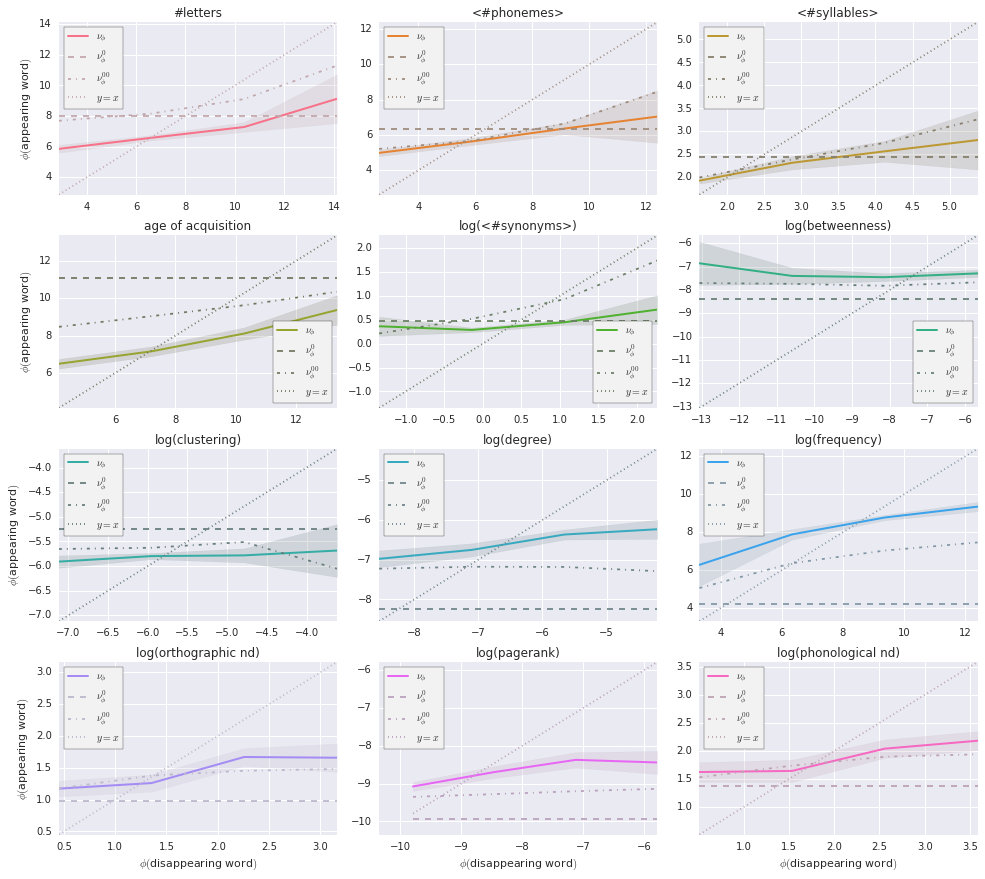

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

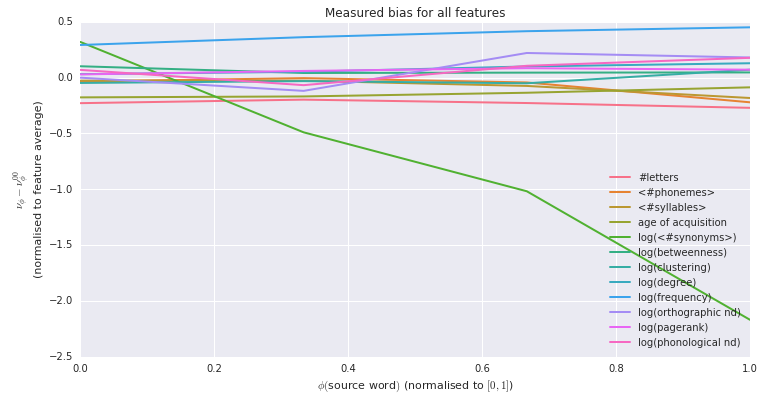

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | **  | ns. |


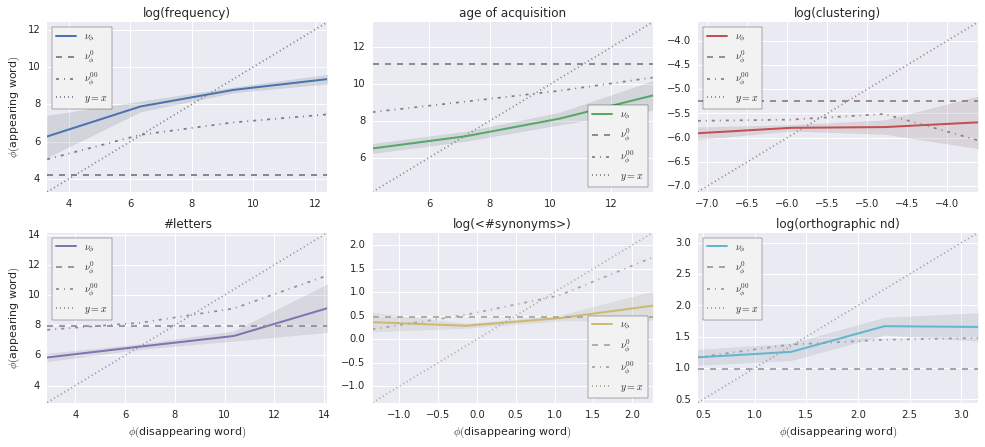

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

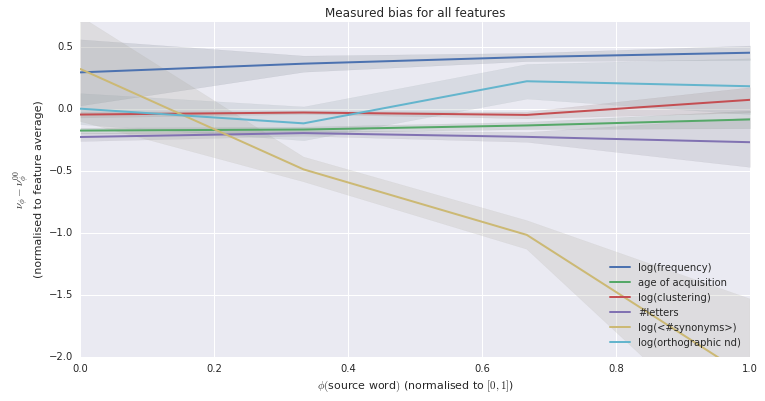

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *   | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | *** | **  |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | ns. | ns. | *   | *   |


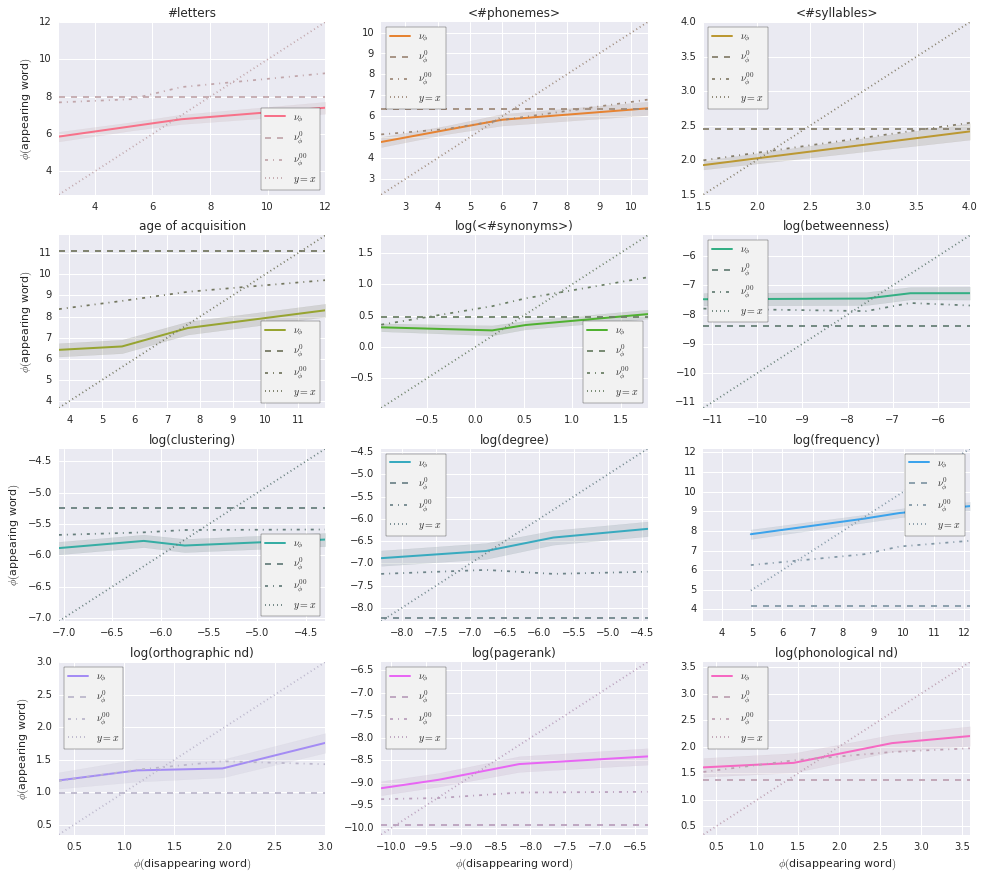

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

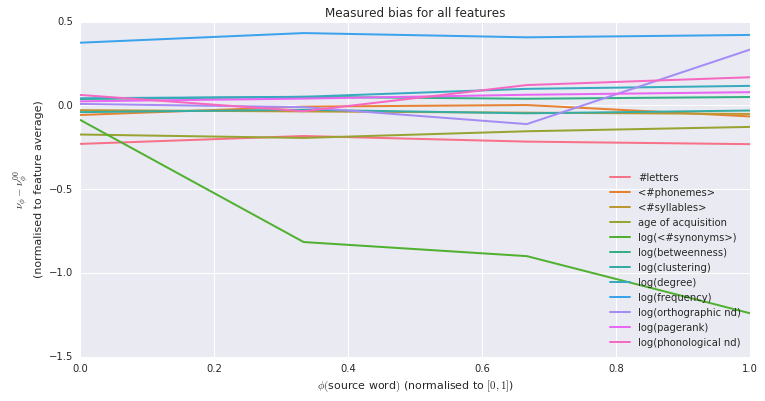

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | **  | *** | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


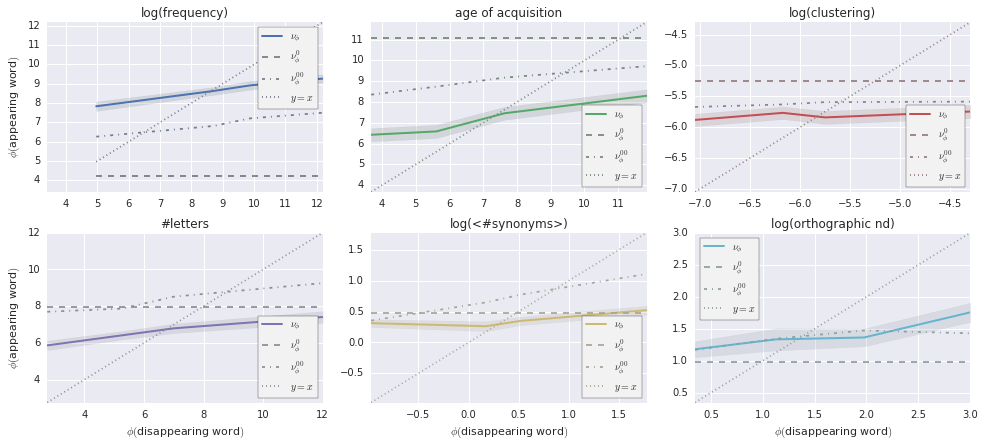

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

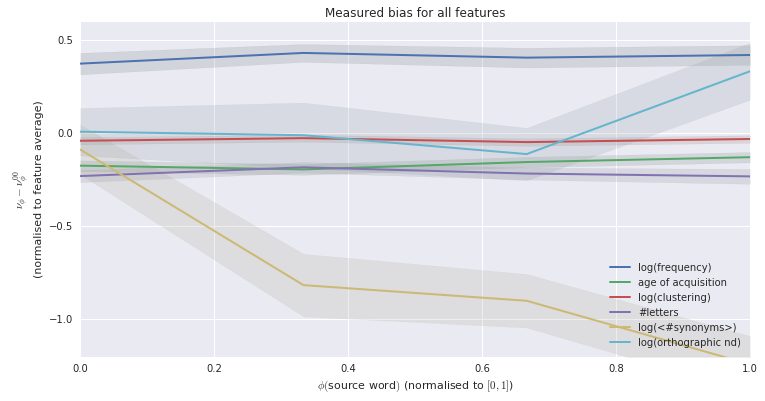

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *   | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


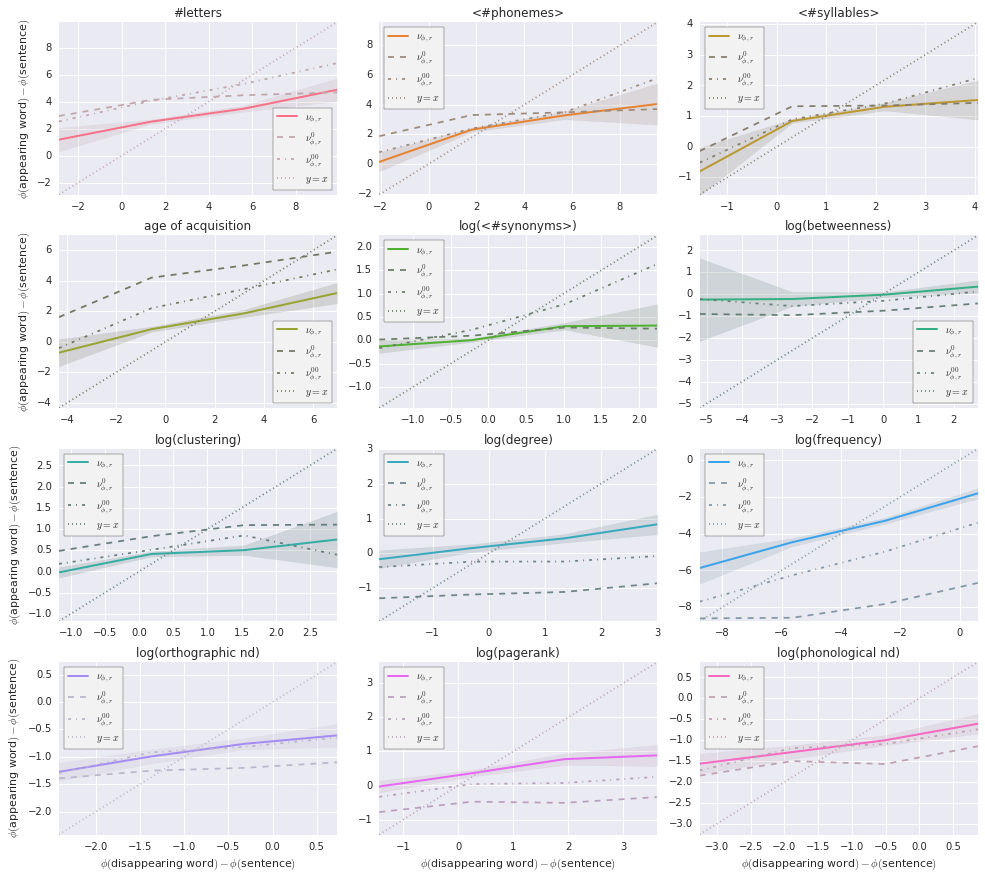

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

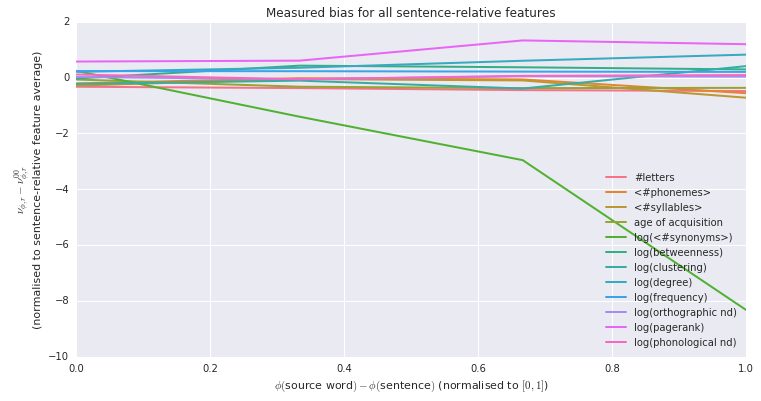

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


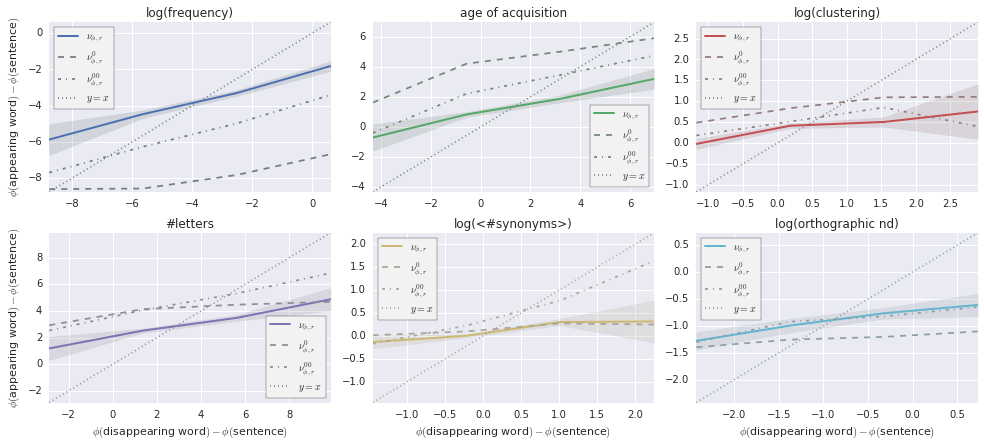

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

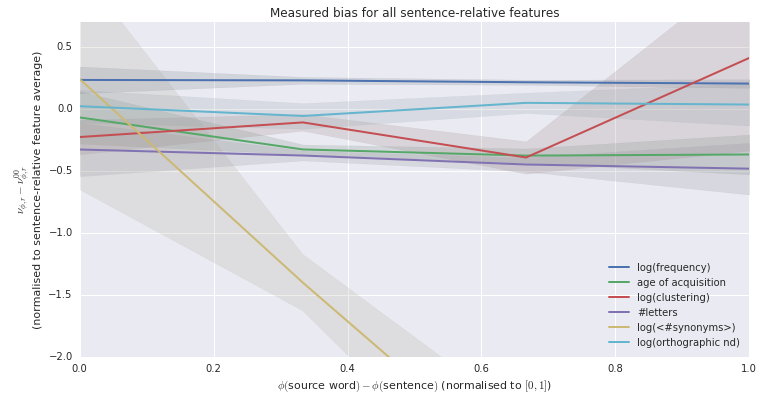

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | ns. | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |


H_00 | ns. | ns. | *   | ns. |


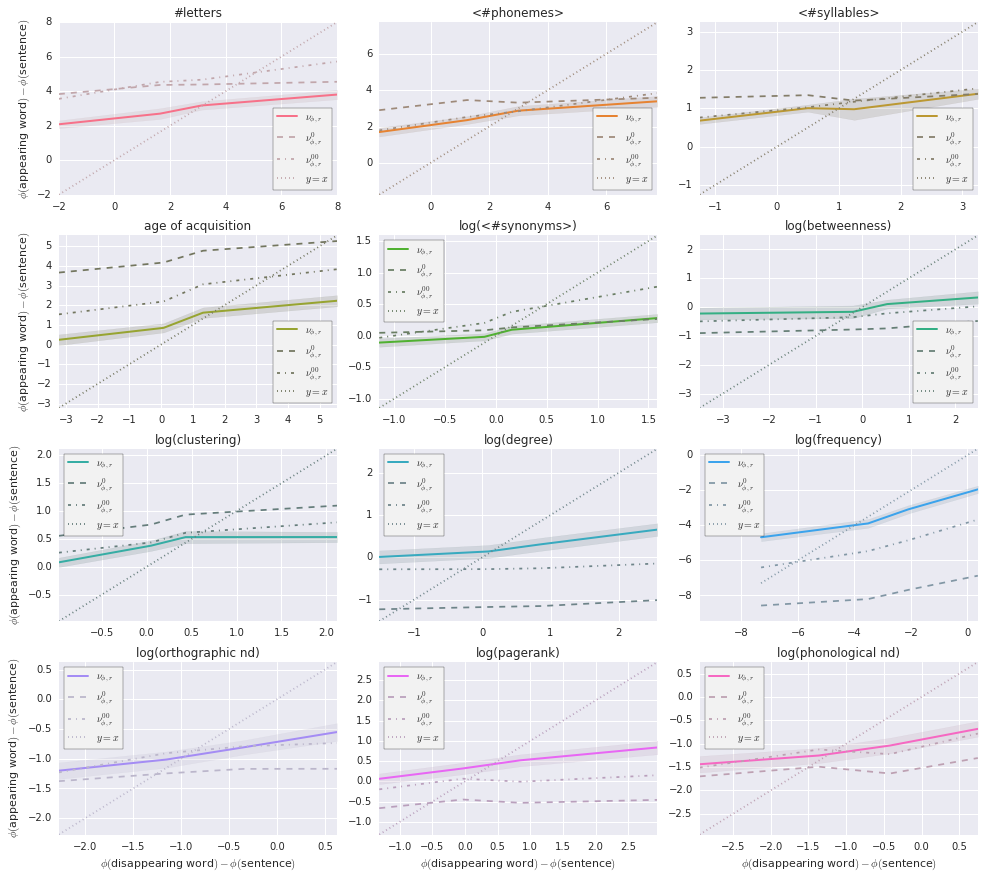

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

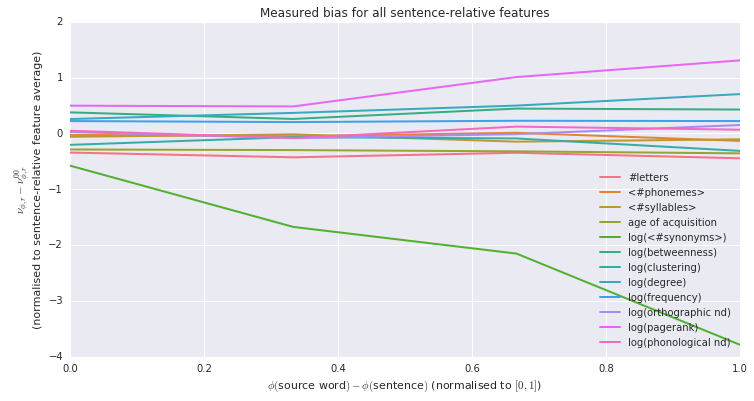

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | ns. | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | *   |


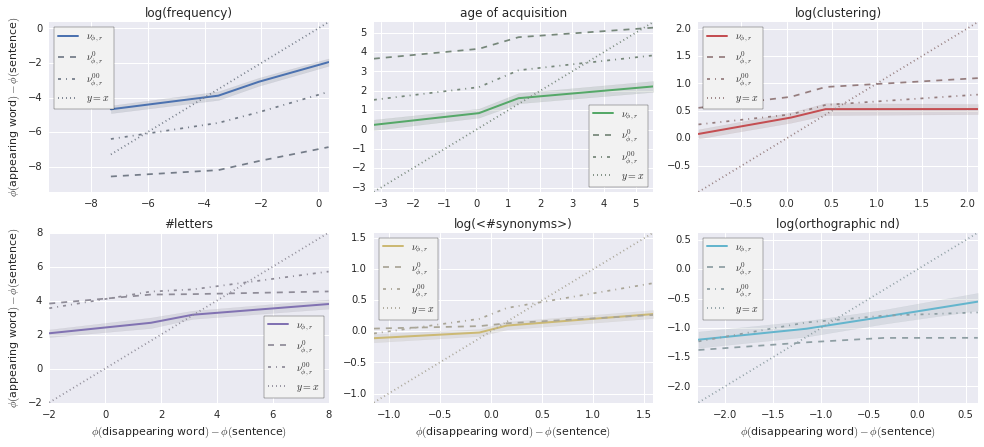

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

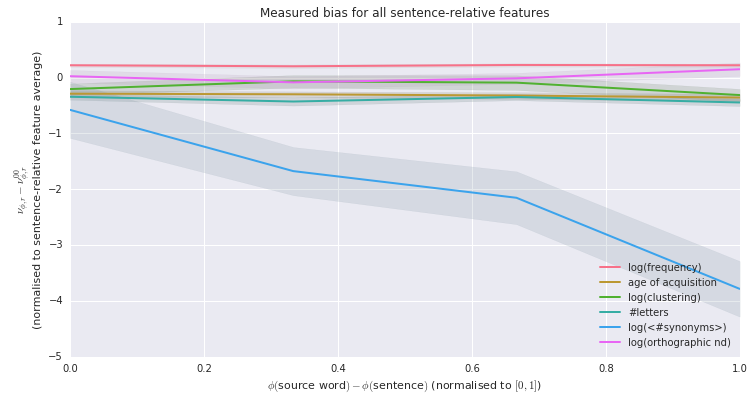

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


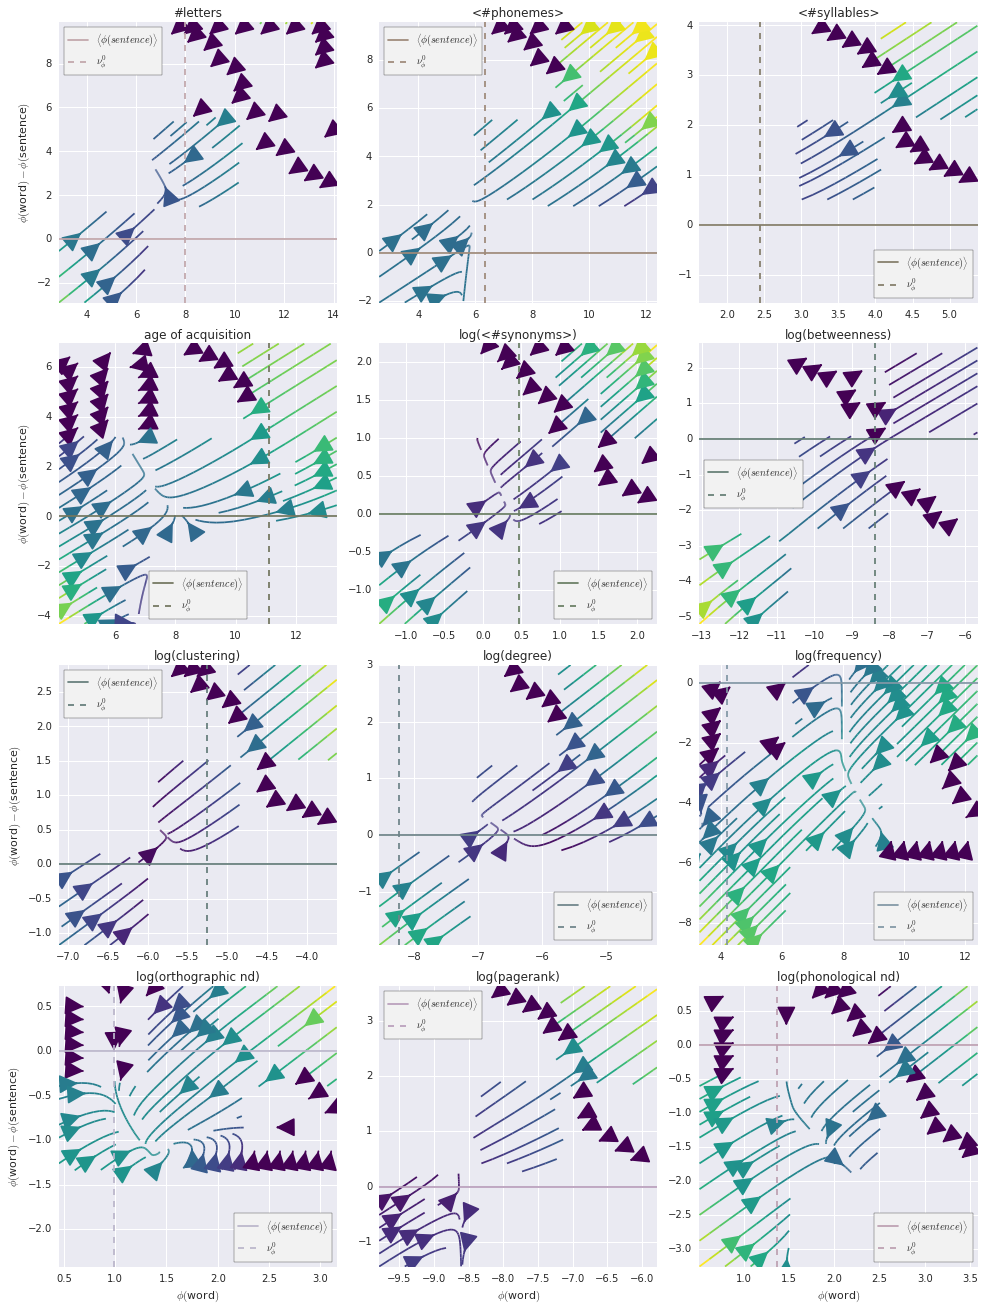

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


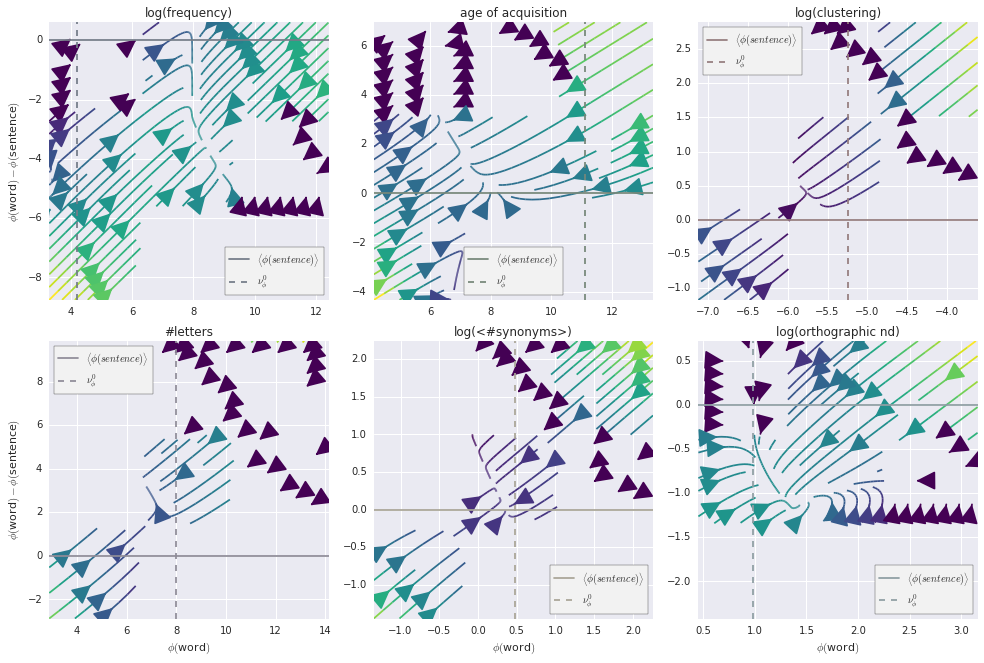

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54592671  0.16271588  0.07991678  0.07409271  0.03373343  0.03044308
  0.01830013  0.01713546  0.01652317  0.0089701 ]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.427764,0.283759,-0.089472,0.245792,0.229850,-0.449654,0.221950,0.282619,-0.426400,0.276820,-0.159614,-0.001335
Component-1,0.345614,-0.376443,0.140480,-0.297578,-0.268808,-0.425018,0.152353,-0.315924,-0.428158,0.203662,-0.172741,-0.000870
Component-2,0.741466,0.238557,-0.143220,0.096703,0.586037,-0.082116,0.002898,0.050598,-0.018035,0.075508,0.014736,-0.066779


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 13005) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 13005) |                    | Elapsed Time: 0:00:43 ETA: 17:23:54

  0% (   36 of 13005) |                     | Elapsed Time: 0:00:43 ETA: 4:21:54

  0% (   68 of 13005) |                     | Elapsed Time: 0:00:43 ETA: 2:18:58

  0% (   97 of 13005) |                     | Elapsed Time: 0:00:44 ETA: 1:37:40

  0% (  121 of 13005) |                     | Elapsed Time: 0:00:44 ETA: 0:01:44

  1% (  163 of 13005) |                     | Elapsed Time: 0:00:44 ETA: 0:01:32

  1% (  195 of 13005) |                     | Elapsed Time: 0:00:44 ETA: 0:01:30

  1% (  227 of 13005) |                     | Elapsed Time: 0:00:44 ETA: 0:01:29

  1% (  257 of 13005) |                     | Elapsed Time: 0:00:45 ETA: 0:01:26

  2% (  287 of 13005) |                     | Elapsed Time: 0:00:45 ETA: 0:01:23

  2% (  326 of 13005) |                     | Elapsed Time: 0:00:45 ETA: 0:01:25

  2% (  348 of 13005) |                     | Elapsed Time: 0:00:45 ETA: 0:01:31

  2% (  368 of 13005) |                     | Elapsed Time: 0:00:46 ETA: 0:01:41

  2% (  388 of 13005) |                     | Elapsed Time: 0:00:46 ETA: 0:01:50

  3% (  407 of 13005) |                     | Elapsed Time: 0:00:46 ETA: 0:02:03

  3% (  426 of 13005) |                     | Elapsed Time: 0:00:46 ETA: 0:02:18

  3% (  446 of 13005) |                     | Elapsed Time: 0:00:46 ETA: 0:02:17

  3% (  466 of 13005) |                     | Elapsed Time: 0:00:47 ETA: 0:02:17

  3% (  488 of 13005) |                     | Elapsed Time: 0:00:47 ETA: 0:02:17

  3% (  508 of 13005) |                     | Elapsed Time: 0:00:47 ETA: 0:02:16

  4% (  528 of 13005) |                     | Elapsed Time: 0:00:47 ETA: 0:02:16

  4% (  548 of 13005) |                     | Elapsed Time: 0:00:48 ETA: 0:02:16

  4% (  567 of 13005) |                     | Elapsed Time: 0:00:48 ETA: 0:02:16

  4% (  587 of 13005) |                     | Elapsed Time: 0:00:48 ETA: 0:02:16

  4% (  606 of 13005) |                     | Elapsed Time: 0:00:48 ETA: 0:02:16

  4% (  626 of 13005) |#                    | Elapsed Time: 0:00:48 ETA: 0:02:15

  5% (  651 of 13005) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:11

  5% (  673 of 13005) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:06

  5% (  695 of 13005) |#                    | Elapsed Time: 0:00:49 ETA: 0:02:03

  5% (  722 of 13005) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:53

  5% (  751 of 13005) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:44

  5% (  779 of 13005) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:37

  6% (  813 of 13005) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:31

  6% (  843 of 13005) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:27

  6% (  875 of 13005) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:24

  6% (  905 of 13005) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:23

  7% (  929 of 13005) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:26

  7% (  949 of 13005) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:31

  7% (  976 of 13005) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:42

  7% (  996 of 13005) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:55

  7% ( 1016 of 13005) |#                    | Elapsed Time: 0:00:52 ETA: 0:02:03

  7% ( 1036 of 13005) |#                    | Elapsed Time: 0:00:52 ETA: 0:02:05

  8% ( 1056 of 13005) |#                    | Elapsed Time: 0:00:52 ETA: 0:02:04

  8% ( 1083 of 13005) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:55

  8% ( 1115 of 13005) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:41

  8% ( 1149 of 13005) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:36

  8% ( 1169 of 13005) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:36

  9% ( 1189 of 13005) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:37

  9% ( 1207 of 13005) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:50

  9% ( 1233 of 13005) |#                    | Elapsed Time: 0:00:54 ETA: 0:01:53

  9% ( 1261 of 13005) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:48

 10% ( 1301 of 13005) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:38

 10% ( 1331 of 13005) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:29

 10% ( 1350 of 13005) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:30

 10% ( 1368 of 13005) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:37

 10% ( 1386 of 13005) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:50

 10% ( 1404 of 13005) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:09

 10% ( 1422 of 13005) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:18

 11% ( 1449 of 13005) |##                   | Elapsed Time: 0:00:56 ETA: 0:02:03

 11% ( 1476 of 13005) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:57

 11% ( 1506 of 13005) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:43

 11% ( 1533 of 13005) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:35

 11% ( 1555 of 13005) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:36

 12% ( 1576 of 13005) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:36

 12% ( 1598 of 13005) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:37

 12% ( 1626 of 13005) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:41

 12% ( 1652 of 13005) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:39

 12% ( 1676 of 13005) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:37

 13% ( 1697 of 13005) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:39

 13% ( 1727 of 13005) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:32

 13% ( 1757 of 13005) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:29

 13% ( 1789 of 13005) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:27

 13% ( 1805 of 13005) |##                   | Elapsed Time: 0:00:59 ETA: 0:01:29

 14% ( 1830 of 13005) |##                   | Elapsed Time: 0:00:59 ETA: 0:01:31

 14% ( 1856 of 13005) |##                   | Elapsed Time: 0:00:59 ETA: 0:01:34

 14% ( 1874 of 13005) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:45

 14% ( 1901 of 13005) |###                  | Elapsed Time: 0:00:59 ETA: 0:01:39

 14% ( 1930 of 13005) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:31

 15% ( 1963 of 13005) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:32

 15% ( 1983 of 13005) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:32

 15% ( 2008 of 13005) |###                  | Elapsed Time: 0:01:00 ETA: 0:01:30

 15% ( 2028 of 13005) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:35

 15% ( 2044 of 13005) |###                  | Elapsed Time: 0:01:01 ETA: 0:01:51

 15% ( 2060 of 13005) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:03

 15% ( 2076 of 13005) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:09

 16% ( 2092 of 13005) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:23

 16% ( 2114 of 13005) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:23

 16% ( 2130 of 13005) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:21

 16% ( 2146 of 13005) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:19

 16% ( 2162 of 13005) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:18

 16% ( 2178 of 13005) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:18

 16% ( 2194 of 13005) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:17

 16% ( 2210 of 13005) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:17

 17% ( 2226 of 13005) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:17

 17% ( 2242 of 13005) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:17

 17% ( 2258 of 13005) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:17

 17% ( 2276 of 13005) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:17

 17% ( 2300 of 13005) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:16

 17% ( 2318 of 13005) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:15

 17% ( 2335 of 13005) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:13

 18% ( 2351 of 13005) |###                  | Elapsed Time: 0:01:05 ETA: 0:02:13

 18% ( 2378 of 13005) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:56

 18% ( 2402 of 13005) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:47

 18% ( 2426 of 13005) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:39

 18% ( 2451 of 13005) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:33

 19% ( 2475 of 13005) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:30

 19% ( 2499 of 13005) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:32

 19% ( 2521 of 13005) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:33

 19% ( 2543 of 13005) |####                 | Elapsed Time: 0:01:06 ETA: 0:01:34

 19% ( 2568 of 13005) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:32

 20% ( 2601 of 13005) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:30

 20% ( 2624 of 13005) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:30

 20% ( 2647 of 13005) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:29

 20% ( 2673 of 13005) |####                 | Elapsed Time: 0:01:07 ETA: 0:01:27

 20% ( 2704 of 13005) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:24

 20% ( 2727 of 13005) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:24

 21% ( 2743 of 13005) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:31

 21% ( 2764 of 13005) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:38

 21% ( 2790 of 13005) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:42

 21% ( 2817 of 13005) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:46

 21% ( 2831 of 13005) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:49

 21% ( 2845 of 13005) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:50

 22% ( 2871 of 13005) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:39

 22% ( 2903 of 13005) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:39

 22% ( 2940 of 13005) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:29

 22% ( 2967 of 13005) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:19

 23% ( 2995 of 13005) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:12

 23% ( 3023 of 13005) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:15

 23% ( 3047 of 13005) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:17

 23% ( 3071 of 13005) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:18

 23% ( 3103 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:21

 24% ( 3127 of 13005) |#####                | Elapsed Time: 0:01:11 ETA: 0:01:22

 24% ( 3156 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:20

 24% ( 3185 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:16

 24% ( 3211 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:14

 25% ( 3252 of 13005) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:12

 25% ( 3282 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:09

 25% ( 3312 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:09

 25% ( 3342 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:08

 25% ( 3367 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:08

 26% ( 3387 of 13005) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:16

 26% ( 3414 of 13005) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:20

 26% ( 3438 of 13005) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:27

 26% ( 3462 of 13005) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:25

 26% ( 3486 of 13005) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:27

 27% ( 3514 of 13005) |#####                | Elapsed Time: 0:01:14 ETA: 0:01:21

 27% ( 3534 of 13005) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:22

 27% ( 3553 of 13005) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:25

 27% ( 3593 of 13005) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:18

 27% ( 3624 of 13005) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:14

 28% ( 3650 of 13005) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:15

 28% ( 3675 of 13005) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:08

 28% ( 3700 of 13005) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:09

 28% ( 3722 of 13005) |######               | Elapsed Time: 0:01:16 ETA: 0:01:16

 28% ( 3751 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:22

 29% ( 3774 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:24

 29% ( 3799 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:24

 29% ( 3822 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:25

 29% ( 3851 of 13005) |######               | Elapsed Time: 0:01:17 ETA: 0:01:16

 29% ( 3883 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:10

 30% ( 3916 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:07

 30% ( 3946 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:03

 30% ( 3975 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:02

 30% ( 3997 of 13005) |######               | Elapsed Time: 0:01:18 ETA: 0:01:06

 30% ( 4024 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:09

 31% ( 4065 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:08

 31% ( 4094 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:09

 31% ( 4114 of 13005) |######               | Elapsed Time: 0:01:19 ETA: 0:01:12

 31% ( 4133 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:16

 31% ( 4151 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:23

 32% ( 4175 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:29

 32% ( 4203 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:23

 32% ( 4245 of 13005) |######               | Elapsed Time: 0:01:20 ETA: 0:01:13

 32% ( 4275 of 13005) |######               | Elapsed Time: 0:01:21 ETA: 0:01:06

 33% ( 4305 of 13005) |######               | Elapsed Time: 0:01:21 ETA: 0:01:00

 33% ( 4333 of 13005) |######               | Elapsed Time: 0:01:21 ETA: 0:00:59

 33% ( 4356 of 13005) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:02

 33% ( 4390 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:04

 33% ( 4418 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:05

 34% ( 4436 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:10

 34% ( 4456 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:15

 34% ( 4482 of 13005) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:14

 34% ( 4505 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:20

 34% ( 4533 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:16

 35% ( 4565 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:10

 35% ( 4590 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:09

 35% ( 4618 of 13005) |#######              | Elapsed Time: 0:01:23 ETA: 0:01:06

 35% ( 4647 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:04

 35% ( 4677 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:01:02

 36% ( 4715 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:00:58

 36% ( 4744 of 13005) |#######              | Elapsed Time: 0:01:24 ETA: 0:00:58

 36% ( 4774 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:00:57

 36% ( 4799 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:00:59

 37% ( 4825 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:00

 37% ( 4857 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:00:59

 37% ( 4892 of 13005) |#######              | Elapsed Time: 0:01:25 ETA: 0:00:57

 37% ( 4920 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:00:57

 38% ( 4950 of 13005) |#######              | Elapsed Time: 0:01:26 ETA: 0:00:55

 38% ( 4981 of 13005) |########             | Elapsed Time: 0:01:26 ETA: 0:00:53

 38% ( 5007 of 13005) |########             | Elapsed Time: 0:01:26 ETA: 0:00:57

 38% ( 5040 of 13005) |########             | Elapsed Time: 0:01:27 ETA: 0:01:00

 38% ( 5071 of 13005) |########             | Elapsed Time: 0:01:27 ETA: 0:00:59

 39% ( 5091 of 13005) |########             | Elapsed Time: 0:01:27 ETA: 0:01:04

 39% ( 5124 of 13005) |########             | Elapsed Time: 0:01:27 ETA: 0:01:03

 39% ( 5149 of 13005) |########             | Elapsed Time: 0:01:27 ETA: 0:01:00

 39% ( 5175 of 13005) |########             | Elapsed Time: 0:01:28 ETA: 0:01:01

 40% ( 5213 of 13005) |########             | Elapsed Time: 0:01:28 ETA: 0:00:59

 40% ( 5238 of 13005) |########             | Elapsed Time: 0:01:28 ETA: 0:01:01

 40% ( 5261 of 13005) |########             | Elapsed Time: 0:01:28 ETA: 0:01:04

 40% ( 5290 of 13005) |########             | Elapsed Time: 0:01:29 ETA: 0:01:02

 40% ( 5325 of 13005) |########             | Elapsed Time: 0:01:29 ETA: 0:00:58

 41% ( 5354 of 13005) |########             | Elapsed Time: 0:01:29 ETA: 0:01:02

 41% ( 5380 of 13005) |########             | Elapsed Time: 0:01:29 ETA: 0:01:02

 41% ( 5426 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:00

 41% ( 5450 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:02

 42% ( 5471 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:01

 42% ( 5500 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:00:58

 42% ( 5528 of 13005) |########             | Elapsed Time: 0:01:30 ETA: 0:01:03

 42% ( 5558 of 13005) |########             | Elapsed Time: 0:01:31 ETA: 0:01:02

 42% ( 5586 of 13005) |#########            | Elapsed Time: 0:01:31 ETA: 0:00:58

 43% ( 5611 of 13005) |#########            | Elapsed Time: 0:01:31 ETA: 0:00:58

 43% ( 5623 of 13005) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:08

 43% ( 5643 of 13005) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:12

 43% ( 5671 of 13005) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:12

 43% ( 5700 of 13005) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:15

 44% ( 5727 of 13005) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:07

 44% ( 5752 of 13005) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:00

 44% ( 5771 of 13005) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:02

 44% ( 5789 of 13005) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:10

 44% ( 5816 of 13005) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:08

 45% ( 5853 of 13005) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:03

 45% ( 5883 of 13005) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:01

 45% ( 5911 of 13005) |#########            | Elapsed Time: 0:01:34 ETA: 0:00:53

 45% ( 5944 of 13005) |#########            | Elapsed Time: 0:01:34 ETA: 0:00:50

 45% ( 5970 of 13005) |#########            | Elapsed Time: 0:01:34 ETA: 0:00:50

 46% ( 5997 of 13005) |#########            | Elapsed Time: 0:01:34 ETA: 0:00:50

 46% ( 6026 of 13005) |#########            | Elapsed Time: 0:01:35 ETA: 0:00:55

 46% ( 6048 of 13005) |#########            | Elapsed Time: 0:01:35 ETA: 0:00:59

 46% ( 6072 of 13005) |#########            | Elapsed Time: 0:01:35 ETA: 0:01:02

 46% ( 6101 of 13005) |#########            | Elapsed Time: 0:01:35 ETA: 0:00:59

 47% ( 6126 of 13005) |#########            | Elapsed Time: 0:01:36 ETA: 0:00:59

 47% ( 6155 of 13005) |#########            | Elapsed Time: 0:01:36 ETA: 0:00:54

 47% ( 6193 of 13005) |##########           | Elapsed Time: 0:01:36 ETA: 0:00:48

 47% ( 6222 of 13005) |##########           | Elapsed Time: 0:01:36 ETA: 0:00:50

 48% ( 6251 of 13005) |##########           | Elapsed Time: 0:01:36 ETA: 0:00:49

 48% ( 6274 of 13005) |##########           | Elapsed Time: 0:01:37 ETA: 0:00:51

 48% ( 6293 of 13005) |##########           | Elapsed Time: 0:01:37 ETA: 0:00:54

 48% ( 6315 of 13005) |##########           | Elapsed Time: 0:01:37 ETA: 0:00:58

 48% ( 6340 of 13005) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:01

 48% ( 6365 of 13005) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:02

 49% ( 6391 of 13005) |##########           | Elapsed Time: 0:01:38 ETA: 0:00:59

 49% ( 6420 of 13005) |##########           | Elapsed Time: 0:01:38 ETA: 0:00:53

 49% ( 6445 of 13005) |##########           | Elapsed Time: 0:01:38 ETA: 0:00:53

 49% ( 6474 of 13005) |##########           | Elapsed Time: 0:01:38 ETA: 0:00:50

 50% ( 6503 of 13005) |##########           | Elapsed Time: 0:01:39 ETA: 0:00:48

 50% ( 6534 of 13005) |##########           | Elapsed Time: 0:01:39 ETA: 0:00:47

 50% ( 6566 of 13005) |##########           | Elapsed Time: 0:01:39 ETA: 0:00:45

 50% ( 6595 of 13005) |##########           | Elapsed Time: 0:01:39 ETA: 0:00:44

 50% ( 6626 of 13005) |##########           | Elapsed Time: 0:01:39 ETA: 0:00:43

 51% ( 6648 of 13005) |##########           | Elapsed Time: 0:01:40 ETA: 0:00:45

 51% ( 6681 of 13005) |##########           | Elapsed Time: 0:01:40 ETA: 0:00:45

 51% ( 6709 of 13005) |##########           | Elapsed Time: 0:01:40 ETA: 0:00:46

 51% ( 6747 of 13005) |##########           | Elapsed Time: 0:01:40 ETA: 0:00:47

 52% ( 6774 of 13005) |##########           | Elapsed Time: 0:01:40 ETA: 0:00:45

 52% ( 6786 of 13005) |##########           | Elapsed Time: 0:01:41 ETA: 0:00:56

 52% ( 6798 of 13005) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:08

 52% ( 6810 of 13005) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:26

 52% ( 6842 of 13005) |###########          | Elapsed Time: 0:01:41 ETA: 0:01:27

 52% ( 6865 of 13005) |###########          | Elapsed Time: 0:01:42 ETA: 0:01:19

 52% ( 6890 of 13005) |###########          | Elapsed Time: 0:01:42 ETA: 0:01:06

 53% ( 6910 of 13005) |###########          | Elapsed Time: 0:01:42 ETA: 0:01:00

 53% ( 6945 of 13005) |###########          | Elapsed Time: 0:01:42 ETA: 0:00:48

 53% ( 6975 of 13005) |###########          | Elapsed Time: 0:01:43 ETA: 0:00:46

 53% ( 7006 of 13005) |###########          | Elapsed Time: 0:01:43 ETA: 0:00:43

 54% ( 7029 of 13005) |###########          | Elapsed Time: 0:01:43 ETA: 0:00:44

 54% ( 7051 of 13005) |###########          | Elapsed Time: 0:01:43 ETA: 0:00:46

 54% ( 7073 of 13005) |###########          | Elapsed Time: 0:01:43 ETA: 0:00:50

 54% ( 7095 of 13005) |###########          | Elapsed Time: 0:01:44 ETA: 0:00:53

 54% ( 7120 of 13005) |###########          | Elapsed Time: 0:01:44 ETA: 0:00:56

 54% ( 7137 of 13005) |###########          | Elapsed Time: 0:01:44 ETA: 0:00:57

 55% ( 7164 of 13005) |###########          | Elapsed Time: 0:01:44 ETA: 0:00:58

 55% ( 7197 of 13005) |###########          | Elapsed Time: 0:01:45 ETA: 0:00:52

 55% ( 7231 of 13005) |###########          | Elapsed Time: 0:01:45 ETA: 0:00:48

 55% ( 7257 of 13005) |###########          | Elapsed Time: 0:01:45 ETA: 0:00:45

 55% ( 7280 of 13005) |###########          | Elapsed Time: 0:01:45 ETA: 0:00:42

 56% ( 7302 of 13005) |###########          | Elapsed Time: 0:01:45 ETA: 0:00:43

 56% ( 7328 of 13005) |###########          | Elapsed Time: 0:01:46 ETA: 0:00:47

 56% ( 7353 of 13005) |###########          | Elapsed Time: 0:01:46 ETA: 0:00:50

 56% ( 7373 of 13005) |###########          | Elapsed Time: 0:01:46 ETA: 0:00:52

 56% ( 7395 of 13005) |###########          | Elapsed Time: 0:01:46 ETA: 0:00:52

 57% ( 7424 of 13005) |###########          | Elapsed Time: 0:01:46 ETA: 0:00:49

 57% ( 7454 of 13005) |############         | Elapsed Time: 0:01:47 ETA: 0:00:47

 57% ( 7478 of 13005) |############         | Elapsed Time: 0:01:47 ETA: 0:00:49

 57% ( 7493 of 13005) |############         | Elapsed Time: 0:01:47 ETA: 0:00:51

 57% ( 7505 of 13005) |############         | Elapsed Time: 0:01:47 ETA: 0:01:01

 57% ( 7517 of 13005) |############         | Elapsed Time: 0:01:48 ETA: 0:01:16

 57% ( 7540 of 13005) |############         | Elapsed Time: 0:01:48 ETA: 0:01:13

 58% ( 7569 of 13005) |############         | Elapsed Time: 0:01:48 ETA: 0:01:05

 58% ( 7601 of 13005) |############         | Elapsed Time: 0:01:48 ETA: 0:00:51

 58% ( 7641 of 13005) |############         | Elapsed Time: 0:01:49 ETA: 0:00:42

 58% ( 7666 of 13005) |############         | Elapsed Time: 0:01:49 ETA: 0:00:38

 59% ( 7695 of 13005) |############         | Elapsed Time: 0:01:49 ETA: 0:00:37

 59% ( 7724 of 13005) |############         | Elapsed Time: 0:01:49 ETA: 0:00:37

 59% ( 7753 of 13005) |############         | Elapsed Time: 0:01:49 ETA: 0:00:38

 59% ( 7785 of 13005) |############         | Elapsed Time: 0:01:50 ETA: 0:00:40

 60% ( 7819 of 13005) |############         | Elapsed Time: 0:01:50 ETA: 0:00:39

 60% ( 7847 of 13005) |############         | Elapsed Time: 0:01:50 ETA: 0:00:39

 60% ( 7870 of 13005) |############         | Elapsed Time: 0:01:50 ETA: 0:00:41

 60% ( 7892 of 13005) |############         | Elapsed Time: 0:01:51 ETA: 0:00:41

 60% ( 7920 of 13005) |############         | Elapsed Time: 0:01:51 ETA: 0:00:41

 61% ( 7947 of 13005) |############         | Elapsed Time: 0:01:51 ETA: 0:00:42

 61% ( 7979 of 13005) |############         | Elapsed Time: 0:01:51 ETA: 0:00:43

 61% ( 8003 of 13005) |############         | Elapsed Time: 0:01:51 ETA: 0:00:41

 61% ( 8031 of 13005) |############         | Elapsed Time: 0:01:52 ETA: 0:00:40

 62% ( 8064 of 13005) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:39

 62% ( 8099 of 13005) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:34

 62% ( 8129 of 13005) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:33

 62% ( 8156 of 13005) |#############        | Elapsed Time: 0:01:52 ETA: 0:00:32

 62% ( 8185 of 13005) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:32

 63% ( 8206 of 13005) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:35

 63% ( 8233 of 13005) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:36

 63% ( 8266 of 13005) |#############        | Elapsed Time: 0:01:53 ETA: 0:00:35

 63% ( 8291 of 13005) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:38

 63% ( 8307 of 13005) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:43

 64% ( 8337 of 13005) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:40

 64% ( 8362 of 13005) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:42

 64% ( 8391 of 13005) |#############        | Elapsed Time: 0:01:54 ETA: 0:00:43

 64% ( 8421 of 13005) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:34

 65% ( 8469 of 13005) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:31

 65% ( 8500 of 13005) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:31

 65% ( 8525 of 13005) |#############        | Elapsed Time: 0:01:55 ETA: 0:00:31

 65% ( 8564 of 13005) |#############        | Elapsed Time: 0:01:56 ETA: 0:00:31

 66% ( 8592 of 13005) |#############        | Elapsed Time: 0:01:56 ETA: 0:00:32

 66% ( 8632 of 13005) |#############        | Elapsed Time: 0:01:56 ETA: 0:00:33

 66% ( 8654 of 13005) |#############        | Elapsed Time: 0:01:56 ETA: 0:00:33

 66% ( 8673 of 13005) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:35

 66% ( 8693 of 13005) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:38

 67% ( 8717 of 13005) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:38

 67% ( 8744 of 13005) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:39

 67% ( 8779 of 13005) |##############       | Elapsed Time: 0:01:57 ETA: 0:00:37

 67% ( 8802 of 13005) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:35

 67% ( 8824 of 13005) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:35

 68% ( 8850 of 13005) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:35

 68% ( 8869 of 13005) |##############       | Elapsed Time: 0:01:58 ETA: 0:00:38

 68% ( 8892 of 13005) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:38

 68% ( 8918 of 13005) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:37

 68% ( 8957 of 13005) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:33

 69% ( 8981 of 13005) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:33

 69% ( 9008 of 13005) |##############       | Elapsed Time: 0:01:59 ETA: 0:00:30

 69% ( 9042 of 13005) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:28

 69% ( 9069 of 13005) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:28

 69% ( 9083 of 13005) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:32

 70% ( 9104 of 13005) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:35

 70% ( 9129 of 13005) |##############       | Elapsed Time: 0:02:00 ETA: 0:00:36

 70% ( 9156 of 13005) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:39

 70% ( 9179 of 13005) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:37

 70% ( 9200 of 13005) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:34

 70% ( 9228 of 13005) |##############       | Elapsed Time: 0:02:01 ETA: 0:00:31

 71% ( 9267 of 13005) |##############       | Elapsed Time: 0:02:02 ETA: 0:00:30

 71% ( 9293 of 13005) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:30

 71% ( 9322 of 13005) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:27

 71% ( 9346 of 13005) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:28

 72% ( 9371 of 13005) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:28

 72% ( 9401 of 13005) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:28

 72% ( 9429 of 13005) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:29

 72% ( 9450 of 13005) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:30

 72% ( 9460 of 13005) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:34

 72% ( 9470 of 13005) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:42

 72% ( 9488 of 13005) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:44

 73% ( 9515 of 13005) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:46

 73% ( 9548 of 13005) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:34

 73% ( 9576 of 13005) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:28

 73% ( 9609 of 13005) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:24

 74% ( 9635 of 13005) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:24

 74% ( 9665 of 13005) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:24

 74% ( 9697 of 13005) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:23

 74% ( 9723 of 13005) |###############      | Elapsed Time: 0:02:05 ETA: 0:00:23

 75% ( 9754 of 13005) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:24

 75% ( 9772 of 13005) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:26

 75% ( 9791 of 13005) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:30

 75% ( 9814 of 13005) |###############      | Elapsed Time: 0:02:06 ETA: 0:00:31

 75% ( 9837 of 13005) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:33

 75% ( 9859 of 13005) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:31

 75% ( 9876 of 13005) |###############      | Elapsed Time: 0:02:07 ETA: 0:00:32

 76% ( 9917 of 13005) |################     | Elapsed Time: 0:02:07 ETA: 0:00:29

 76% ( 9947 of 13005) |################     | Elapsed Time: 0:02:08 ETA: 0:00:26

 76% ( 9973 of 13005) |################     | Elapsed Time: 0:02:08 ETA: 0:00:26

 76% ( 9997 of 13005) |################     | Elapsed Time: 0:02:08 ETA: 0:00:23

 77% (10024 of 13005) |################     | Elapsed Time: 0:02:08 ETA: 0:00:23

 77% (10037 of 13005) |################     | Elapsed Time: 0:02:08 ETA: 0:00:27

 77% (10067 of 13005) |################     | Elapsed Time: 0:02:09 ETA: 0:00:25

 77% (10095 of 13005) |################     | Elapsed Time: 0:02:09 ETA: 0:00:26

 77% (10119 of 13005) |################     | Elapsed Time: 0:02:09 ETA: 0:00:25

 78% (10144 of 13005) |################     | Elapsed Time: 0:02:09 ETA: 0:00:24

 78% (10168 of 13005) |################     | Elapsed Time: 0:02:09 ETA: 0:00:23

 78% (10192 of 13005) |################     | Elapsed Time: 0:02:10 ETA: 0:00:23

 78% (10218 of 13005) |################     | Elapsed Time: 0:02:10 ETA: 0:00:23

 78% (10242 of 13005) |################     | Elapsed Time: 0:02:10 ETA: 0:00:23

 78% (10272 of 13005) |################     | Elapsed Time: 0:02:10 ETA: 0:00:22

 79% (10304 of 13005) |################     | Elapsed Time: 0:02:11 ETA: 0:00:20

 79% (10342 of 13005) |################     | Elapsed Time: 0:02:11 ETA: 0:00:19

 79% (10368 of 13005) |################     | Elapsed Time: 0:02:11 ETA: 0:00:19

 79% (10391 of 13005) |################     | Elapsed Time: 0:02:11 ETA: 0:00:20

 80% (10412 of 13005) |################     | Elapsed Time: 0:02:11 ETA: 0:00:22

 80% (10430 of 13005) |################     | Elapsed Time: 0:02:12 ETA: 0:00:23

 80% (10454 of 13005) |################     | Elapsed Time: 0:02:12 ETA: 0:00:24

 80% (10479 of 13005) |################     | Elapsed Time: 0:02:12 ETA: 0:00:24

 80% (10508 of 13005) |################     | Elapsed Time: 0:02:12 ETA: 0:00:22

 81% (10536 of 13005) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:20

 81% (10567 of 13005) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:18

 81% (10598 of 13005) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:17

 81% (10625 of 13005) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:17

 81% (10654 of 13005) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:17

 82% (10683 of 13005) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:16

 82% (10713 of 13005) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:16

 82% (10742 of 13005) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:16

 82% (10769 of 13005) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:16

 82% (10794 of 13005) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:17

 83% (10817 of 13005) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:17

 83% (10843 of 13005) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:18

 83% (10874 of 13005) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:16

 83% (10904 of 13005) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:16

 84% (10932 of 13005) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:16

 84% (10963 of 13005) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:14

 84% (10991 of 13005) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:14

 84% (11017 of 13005) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:14

 85% (11055 of 13005) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:14

 85% (11086 of 13005) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:13

 85% (11114 of 13005) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:14

 85% (11139 of 13005) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:13

 85% (11165 of 13005) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:13

 86% (11192 of 13005) |##################   | Elapsed Time: 0:02:17 ETA: 0:00:14

 86% (11232 of 13005) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:13

 86% (11264 of 13005) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:12

 86% (11280 of 13005) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:13

 86% (11306 of 13005) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:13

 87% (11336 of 13005) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:13

 87% (11367 of 13005) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:13

 87% (11394 of 13005) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:12

 87% (11419 of 13005) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:11

 87% (11441 of 13005) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:12

 88% (11462 of 13005) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:13

 88% (11491 of 13005) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:12

 88% (11523 of 13005) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:12

 88% (11556 of 13005) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:11

 89% (11581 of 13005) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:10

 89% (11606 of 13005) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:10

 89% (11635 of 13005) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:10

 89% (11653 of 13005) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:11

 89% (11680 of 13005) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:11

 90% (11719 of 13005) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:10

 90% (11741 of 13005) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:10

 90% (11760 of 13005) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:11

 90% (11792 of 13005) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:10

 90% (11813 of 13005) |###################  | Elapsed Time: 0:02:22 ETA: 0:00:10

 91% (11836 of 13005) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:10

 91% (11857 of 13005) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:10

 91% (11880 of 13005) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:10

 91% (11902 of 13005) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:10

 91% (11931 of 13005) |###################  | Elapsed Time: 0:02:23 ETA: 0:00:09

 91% (11954 of 13005) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:09

 92% (11973 of 13005) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:09

 92% (11994 of 13005) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:08

 92% (12014 of 13005) |###################  | Elapsed Time: 0:02:24 ETA: 0:00:09

 92% (12043 of 13005) |###################  | Elapsed Time: 0:02:25 ETA: 0:00:09

 92% (12073 of 13005) |###################  | Elapsed Time: 0:02:25 ETA: 0:00:08

 93% (12098 of 13005) |###################  | Elapsed Time: 0:02:25 ETA: 0:00:07

 93% (12116 of 13005) |###################  | Elapsed Time: 0:02:25 ETA: 0:00:07

 93% (12146 of 13005) |###################  | Elapsed Time: 0:02:25 ETA: 0:00:06

 93% (12178 of 13005) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:06

 93% (12204 of 13005) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:06

 94% (12227 of 13005) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:06

 94% (12251 of 13005) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:06

 94% (12271 of 13005) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:06

 94% (12293 of 13005) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:06

 94% (12312 of 13005) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:06

 95% (12355 of 13005) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:05

 95% (12384 of 13005) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:05

 95% (12410 of 13005) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:04

 95% (12435 of 13005) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:04

 95% (12459 of 13005) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:04

 95% (12475 of 13005) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:04

 96% (12496 of 13005) |#################### | Elapsed Time: 0:02:28 ETA: 0:00:05

 96% (12532 of 13005) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:04

 96% (12563 of 13005) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:03

 96% (12590 of 13005) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:03

 97% (12619 of 13005) |#################### | Elapsed Time: 0:02:29 ETA: 0:00:02

 97% (12645 of 13005) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:02

 97% (12668 of 13005) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:02

 97% (12694 of 13005) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:02

 97% (12722 of 13005) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:02

 97% (12744 of 13005) |#################### | Elapsed Time: 0:02:30 ETA: 0:00:02

 98% (12764 of 13005) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:02

 98% (12790 of 13005) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:01

 98% (12813 of 13005) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:01

 98% (12843 of 13005) |#################### | Elapsed Time: 0:02:31 ETA: 0:00:01

 99% (12885 of 13005) |#################### | Elapsed Time: 0:02:32 ETA: 0:00:00

 99% (12908 of 13005) |#################### | Elapsed Time: 0:02:32 ETA: 0:00:00

 99% (12940 of 13005) |#################### | Elapsed Time: 0:02:32 ETA: 0:00:00

 99% (12967 of 13005) |#################### | Elapsed Time: 0:02:32 ETA: 0:00:00

 99% (12980 of 13005) |#################### | Elapsed Time: 0:02:32 ETA: 0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:02:35 Time: 0:02:35


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | *   | *   | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *   | ns. |


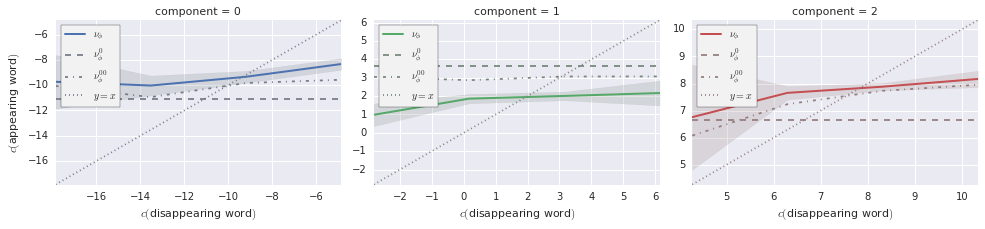

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67708467  0.18316591]



,aoa,frequency,letters_count
Component-0,-0.727905,0.367678,-0.578764
Component-1,0.438702,-0.398972,-0.805209


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 13005) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   16 of 13005) |                     | Elapsed Time: 0:00:02 ETA: 0:40:02

  0% (   49 of 13005) |                     | Elapsed Time: 0:00:03 ETA: 0:13:57

  0% (   86 of 13005) |                     | Elapsed Time: 0:00:03 ETA: 0:08:26

  0% (  119 of 13005) |                     | Elapsed Time: 0:00:03 ETA: 0:06:28

  1% (  163 of 13005) |                     | Elapsed Time: 0:00:03 ETA: 0:01:18

  1% (  199 of 13005) |                     | Elapsed Time: 0:00:04 ETA: 0:01:15

  1% (  235 of 13005) |                     | Elapsed Time: 0:00:04 ETA: 0:01:14

  2% (  272 of 13005) |                     | Elapsed Time: 0:00:04 ETA: 0:01:13

  2% (  326 of 13005) |                     | Elapsed Time: 0:00:04 ETA: 0:01:10

  2% (  355 of 13005) |                     | Elapsed Time: 0:00:04 ETA: 0:01:14

  2% (  381 of 13005) |                     | Elapsed Time: 0:00:05 ETA: 0:01:18

  3% (  408 of 13005) |                     | Elapsed Time: 0:00:05 ETA: 0:01:23

  3% (  434 of 13005) |                     | Elapsed Time: 0:00:05 ETA: 0:01:30

  3% (  460 of 13005) |                     | Elapsed Time: 0:00:05 ETA: 0:01:37

  3% (  488 of 13005) |                     | Elapsed Time: 0:00:06 ETA: 0:01:37

  3% (  515 of 13005) |                     | Elapsed Time: 0:00:06 ETA: 0:01:36

  4% (  542 of 13005) |                     | Elapsed Time: 0:00:06 ETA: 0:01:36

  4% (  569 of 13005) |                     | Elapsed Time: 0:00:06 ETA: 0:01:36

  4% (  595 of 13005) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  4% (  621 of 13005) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:35

  5% (  651 of 13005) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:34

  5% (  678 of 13005) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:33

  5% (  708 of 13005) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:30

  5% (  743 of 13005) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:24

  5% (  779 of 13005) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:18

  6% (  831 of 13005) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:14

  6% (  866 of 13005) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:10

  6% (  902 of 13005) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:09

  7% (  934 of 13005) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:10

  7% (  976 of 13005) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:13

  7% ( 1005 of 13005) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:17

  7% ( 1034 of 13005) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:20

  8% ( 1064 of 13005) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:23

  8% ( 1101 of 13005) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:19

  8% ( 1138 of 13005) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:15

  8% ( 1167 of 13005) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:15

  9% ( 1196 of 13005) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:15

  9% ( 1225 of 13005) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:17

  9% ( 1259 of 13005) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:19

 10% ( 1301 of 13005) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:16

 10% ( 1334 of 13005) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:13

 10% ( 1361 of 13005) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:13

 10% ( 1387 of 13005) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:17

 10% ( 1413 of 13005) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:23

 11% ( 1446 of 13005) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:26

 11% ( 1481 of 13005) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:24

 11% ( 1518 of 13005) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:17

 11% ( 1551 of 13005) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:13

 12% ( 1582 of 13005) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:11

 12% ( 1626 of 13005) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:11

 12% ( 1659 of 13005) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:11

 12% ( 1690 of 13005) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:13

 13% ( 1726 of 13005) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:11

 13% ( 1762 of 13005) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:08

 13% ( 1802 of 13005) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:09

 14% ( 1837 of 13005) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:08

 14% ( 1868 of 13005) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:08

 14% ( 1903 of 13005) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:08

 15% ( 1951 of 13005) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:07

 15% ( 1982 of 13005) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:06

 15% ( 2017 of 13005) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:06

 15% ( 2043 of 13005) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:09

 15% ( 2070 of 13005) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:13

 16% ( 2096 of 13005) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:19

 16% ( 2127 of 13005) |###                  | Elapsed Time: 0:00:16 ETA: 0:01:22

 16% ( 2153 of 13005) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:25

 16% ( 2180 of 13005) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:25

 16% ( 2206 of 13005) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:26

 17% ( 2234 of 13005) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:25

 17% ( 2260 of 13005) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:25

 17% ( 2290 of 13005) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:24

 17% ( 2317 of 13005) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:24

 18% ( 2341 of 13005) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:24

 18% ( 2373 of 13005) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:21

 18% ( 2407 of 13005) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:16

 18% ( 2439 of 13005) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:13

 18% ( 2469 of 13005) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:10

 19% ( 2501 of 13005) |####                 | Elapsed Time: 0:00:19 ETA: 0:01:07

 19% ( 2533 of 13005) |####                 | Elapsed Time: 0:00:19 ETA: 0:01:08

 19% ( 2567 of 13005) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:07

 20% ( 2601 of 13005) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:06

 20% ( 2632 of 13005) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:05

 20% ( 2662 of 13005) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:06

 20% ( 2698 of 13005) |####                 | Elapsed Time: 0:00:20 ETA: 0:01:04

 20% ( 2730 of 13005) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:05

 21% ( 2764 of 13005) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:09

 21% ( 2799 of 13005) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:08

 21% ( 2828 of 13005) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:09

 21% ( 2852 of 13005) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:15

 22% ( 2889 of 13005) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:10

 22% ( 2927 of 13005) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:06

 22% ( 2961 of 13005) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:06

 23% ( 2996 of 13005) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:01

 23% ( 3031 of 13005) |####                 | Elapsed Time: 0:00:23 ETA: 0:00:59

 23% ( 3063 of 13005) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:00

 23% ( 3106 of 13005) |#####                | Elapsed Time: 0:00:23 ETA: 0:01:00

 24% ( 3139 of 13005) |#####                | Elapsed Time: 0:00:23 ETA: 0:01:01

 24% ( 3175 of 13005) |#####                | Elapsed Time: 0:00:23 ETA: 0:01:00

 24% ( 3210 of 13005) |#####                | Elapsed Time: 0:00:24 ETA: 0:00:59

 25% ( 3252 of 13005) |#####                | Elapsed Time: 0:00:24 ETA: 0:00:57

 25% ( 3289 of 13005) |#####                | Elapsed Time: 0:00:24 ETA: 0:00:56

 25% ( 3324 of 13005) |#####                | Elapsed Time: 0:00:24 ETA: 0:00:55

 25% ( 3357 of 13005) |#####                | Elapsed Time: 0:00:24 ETA: 0:00:56

 26% ( 3389 of 13005) |#####                | Elapsed Time: 0:00:25 ETA: 0:00:57

 26% ( 3430 of 13005) |#####                | Elapsed Time: 0:00:25 ETA: 0:00:59

 26% ( 3462 of 13005) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:00

 26% ( 3495 of 13005) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:00

 27% ( 3530 of 13005) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:59

 27% ( 3577 of 13005) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:59

 27% ( 3615 of 13005) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:56

 28% ( 3648 of 13005) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:56

 28% ( 3682 of 13005) |#####                | Elapsed Time: 0:00:26 ETA: 0:00:56

 28% ( 3715 of 13005) |#####                | Elapsed Time: 0:00:27 ETA: 0:00:55

 28% ( 3755 of 13005) |######               | Elapsed Time: 0:00:27 ETA: 0:00:59

 29% ( 3788 of 13005) |######               | Elapsed Time: 0:00:27 ETA: 0:00:59

 29% ( 3819 of 13005) |######               | Elapsed Time: 0:00:27 ETA: 0:01:00

 29% ( 3856 of 13005) |######               | Elapsed Time: 0:00:28 ETA: 0:00:59

 30% ( 3902 of 13005) |######               | Elapsed Time: 0:00:28 ETA: 0:00:55

 30% ( 3939 of 13005) |######               | Elapsed Time: 0:00:28 ETA: 0:00:52

 30% ( 3975 of 13005) |######               | Elapsed Time: 0:00:28 ETA: 0:00:51

 30% ( 4010 of 13005) |######               | Elapsed Time: 0:00:28 ETA: 0:00:51

 31% ( 4047 of 13005) |######               | Elapsed Time: 0:00:29 ETA: 0:00:51

 31% ( 4084 of 13005) |######               | Elapsed Time: 0:00:29 ETA: 0:00:51

 31% ( 4115 of 13005) |######               | Elapsed Time: 0:00:29 ETA: 0:00:52

 31% ( 4143 of 13005) |######               | Elapsed Time: 0:00:29 ETA: 0:00:54

 32% ( 4175 of 13005) |######               | Elapsed Time: 0:00:30 ETA: 0:00:55

 32% ( 4227 of 13005) |######               | Elapsed Time: 0:00:30 ETA: 0:00:54

 32% ( 4265 of 13005) |######               | Elapsed Time: 0:00:30 ETA: 0:00:53

 33% ( 4303 of 13005) |######               | Elapsed Time: 0:00:30 ETA: 0:00:50

 33% ( 4339 of 13005) |#######              | Elapsed Time: 0:00:30 ETA: 0:00:47

 33% ( 4372 of 13005) |#######              | Elapsed Time: 0:00:31 ETA: 0:00:48

 33% ( 4408 of 13005) |#######              | Elapsed Time: 0:00:31 ETA: 0:00:49

 34% ( 4439 of 13005) |#######              | Elapsed Time: 0:00:31 ETA: 0:00:51

 34% ( 4473 of 13005) |#######              | Elapsed Time: 0:00:31 ETA: 0:00:51

 34% ( 4506 of 13005) |#######              | Elapsed Time: 0:00:31 ETA: 0:00:52

 35% ( 4552 of 13005) |#######              | Elapsed Time: 0:00:32 ETA: 0:00:52

 35% ( 4583 of 13005) |#######              | Elapsed Time: 0:00:32 ETA: 0:00:53

 35% ( 4618 of 13005) |#######              | Elapsed Time: 0:00:32 ETA: 0:00:51

 35% ( 4655 of 13005) |#######              | Elapsed Time: 0:00:32 ETA: 0:00:50

 36% ( 4691 of 13005) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:49

 36% ( 4734 of 13005) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:47

 36% ( 4771 of 13005) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:46

 36% ( 4806 of 13005) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:45

 37% ( 4840 of 13005) |#######              | Elapsed Time: 0:00:33 ETA: 0:00:46

 37% ( 4895 of 13005) |#######              | Elapsed Time: 0:00:34 ETA: 0:00:45

 37% ( 4931 of 13005) |#######              | Elapsed Time: 0:00:34 ETA: 0:00:45

 38% ( 4970 of 13005) |########             | Elapsed Time: 0:00:34 ETA: 0:00:44

 38% ( 5006 of 13005) |########             | Elapsed Time: 0:00:34 ETA: 0:00:43

 38% ( 5040 of 13005) |########             | Elapsed Time: 0:00:35 ETA: 0:00:44

 39% ( 5076 of 13005) |########             | Elapsed Time: 0:00:35 ETA: 0:00:44

 39% ( 5114 of 13005) |########             | Elapsed Time: 0:00:35 ETA: 0:00:44

 39% ( 5149 of 13005) |########             | Elapsed Time: 0:00:35 ETA: 0:00:45

 40% ( 5202 of 13005) |########             | Elapsed Time: 0:00:35 ETA: 0:00:44

 40% ( 5236 of 13005) |########             | Elapsed Time: 0:00:36 ETA: 0:00:45

 40% ( 5270 of 13005) |########             | Elapsed Time: 0:00:36 ETA: 0:00:45

 40% ( 5307 of 13005) |########             | Elapsed Time: 0:00:36 ETA: 0:00:45

 41% ( 5341 of 13005) |########             | Elapsed Time: 0:00:36 ETA: 0:00:45

 41% ( 5384 of 13005) |########             | Elapsed Time: 0:00:37 ETA: 0:00:45

 41% ( 5421 of 13005) |########             | Elapsed Time: 0:00:37 ETA: 0:00:44

 41% ( 5452 of 13005) |########             | Elapsed Time: 0:00:37 ETA: 0:00:45

 42% ( 5483 of 13005) |########             | Elapsed Time: 0:00:37 ETA: 0:00:47

 42% ( 5528 of 13005) |########             | Elapsed Time: 0:00:37 ETA: 0:00:46

 42% ( 5565 of 13005) |########             | Elapsed Time: 0:00:38 ETA: 0:00:46

 43% ( 5600 of 13005) |#########            | Elapsed Time: 0:00:38 ETA: 0:00:46

 43% ( 5623 of 13005) |#########            | Elapsed Time: 0:00:38 ETA: 0:00:47

 43% ( 5652 of 13005) |#########            | Elapsed Time: 0:00:38 ETA: 0:00:49

 43% ( 5690 of 13005) |#########            | Elapsed Time: 0:00:39 ETA: 0:00:48

 44% ( 5724 of 13005) |#########            | Elapsed Time: 0:00:39 ETA: 0:00:49

 44% ( 5755 of 13005) |#########            | Elapsed Time: 0:00:39 ETA: 0:00:48

 44% ( 5780 of 13005) |#########            | Elapsed Time: 0:00:39 ETA: 0:00:48

 44% ( 5814 of 13005) |#########            | Elapsed Time: 0:00:39 ETA: 0:00:47

 45% ( 5853 of 13005) |#########            | Elapsed Time: 0:00:40 ETA: 0:00:46

 45% ( 5888 of 13005) |#########            | Elapsed Time: 0:00:40 ETA: 0:00:44

 45% ( 5924 of 13005) |#########            | Elapsed Time: 0:00:40 ETA: 0:00:43

 45% ( 5960 of 13005) |#########            | Elapsed Time: 0:00:40 ETA: 0:00:40

 46% ( 5996 of 13005) |#########            | Elapsed Time: 0:00:40 ETA: 0:00:40

 46% ( 6030 of 13005) |#########            | Elapsed Time: 0:00:41 ETA: 0:00:41

 46% ( 6059 of 13005) |#########            | Elapsed Time: 0:00:41 ETA: 0:00:43

 46% ( 6096 of 13005) |#########            | Elapsed Time: 0:00:41 ETA: 0:00:43

 47% ( 6131 of 13005) |#########            | Elapsed Time: 0:00:41 ETA: 0:00:43

 47% ( 6178 of 13005) |#########            | Elapsed Time: 0:00:42 ETA: 0:00:42

 47% ( 6213 of 13005) |##########           | Elapsed Time: 0:00:42 ETA: 0:00:40

 48% ( 6249 of 13005) |##########           | Elapsed Time: 0:00:42 ETA: 0:00:39

 48% ( 6281 of 13005) |##########           | Elapsed Time: 0:00:42 ETA: 0:00:39

 48% ( 6308 of 13005) |##########           | Elapsed Time: 0:00:42 ETA: 0:00:41

 48% ( 6358 of 13005) |##########           | Elapsed Time: 0:00:43 ETA: 0:00:41

 49% ( 6390 of 13005) |##########           | Elapsed Time: 0:00:43 ETA: 0:00:42

 49% ( 6426 of 13005) |##########           | Elapsed Time: 0:00:43 ETA: 0:00:41

 49% ( 6462 of 13005) |##########           | Elapsed Time: 0:00:43 ETA: 0:00:40

 50% ( 6503 of 13005) |##########           | Elapsed Time: 0:00:43 ETA: 0:00:39

 50% ( 6541 of 13005) |##########           | Elapsed Time: 0:00:44 ETA: 0:00:37

 50% ( 6578 of 13005) |##########           | Elapsed Time: 0:00:44 ETA: 0:00:36

 50% ( 6615 of 13005) |##########           | Elapsed Time: 0:00:44 ETA: 0:00:35

 51% ( 6666 of 13005) |##########           | Elapsed Time: 0:00:44 ETA: 0:00:36

 51% ( 6704 of 13005) |##########           | Elapsed Time: 0:00:45 ETA: 0:00:35

 51% ( 6740 of 13005) |##########           | Elapsed Time: 0:00:45 ETA: 0:00:35

 52% ( 6774 of 13005) |##########           | Elapsed Time: 0:00:45 ETA: 0:00:36

 52% ( 6793 of 13005) |##########           | Elapsed Time: 0:00:45 ETA: 0:00:39

 52% ( 6812 of 13005) |##########           | Elapsed Time: 0:00:45 ETA: 0:00:45

 52% ( 6846 of 13005) |###########          | Elapsed Time: 0:00:46 ETA: 0:00:46

 52% ( 6880 of 13005) |###########          | Elapsed Time: 0:00:46 ETA: 0:00:47

 53% ( 6912 of 13005) |###########          | Elapsed Time: 0:00:46 ETA: 0:00:44

 53% ( 6951 of 13005) |###########          | Elapsed Time: 0:00:46 ETA: 0:00:38

 53% ( 6991 of 13005) |###########          | Elapsed Time: 0:00:47 ETA: 0:00:34

 54% ( 7026 of 13005) |###########          | Elapsed Time: 0:00:47 ETA: 0:00:34

 54% ( 7056 of 13005) |###########          | Elapsed Time: 0:00:47 ETA: 0:00:35

 54% ( 7086 of 13005) |###########          | Elapsed Time: 0:00:47 ETA: 0:00:36

 54% ( 7119 of 13005) |###########          | Elapsed Time: 0:00:47 ETA: 0:00:37

 55% ( 7153 of 13005) |###########          | Elapsed Time: 0:00:48 ETA: 0:00:39

 55% ( 7191 of 13005) |###########          | Elapsed Time: 0:00:48 ETA: 0:00:37

 55% ( 7232 of 13005) |###########          | Elapsed Time: 0:00:48 ETA: 0:00:34

 55% ( 7267 of 13005) |###########          | Elapsed Time: 0:00:48 ETA: 0:00:33

 56% ( 7299 of 13005) |###########          | Elapsed Time: 0:00:48 ETA: 0:00:33

 56% ( 7333 of 13005) |###########          | Elapsed Time: 0:00:49 ETA: 0:00:32

 56% ( 7364 of 13005) |###########          | Elapsed Time: 0:00:49 ETA: 0:00:34

 56% ( 7396 of 13005) |###########          | Elapsed Time: 0:00:49 ETA: 0:00:35

 57% ( 7434 of 13005) |############         | Elapsed Time: 0:00:49 ETA: 0:00:34

 57% ( 7478 of 13005) |############         | Elapsed Time: 0:00:50 ETA: 0:00:34

 57% ( 7502 of 13005) |############         | Elapsed Time: 0:00:50 ETA: 0:00:36

 57% ( 7528 of 13005) |############         | Elapsed Time: 0:00:50 ETA: 0:00:37

 58% ( 7563 of 13005) |############         | Elapsed Time: 0:00:50 ETA: 0:00:37

 58% ( 7602 of 13005) |############         | Elapsed Time: 0:00:50 ETA: 0:00:36

 58% ( 7641 of 13005) |############         | Elapsed Time: 0:00:51 ETA: 0:00:33

 59% ( 7677 of 13005) |############         | Elapsed Time: 0:00:51 ETA: 0:00:30

 59% ( 7714 of 13005) |############         | Elapsed Time: 0:00:51 ETA: 0:00:28

 59% ( 7750 of 13005) |############         | Elapsed Time: 0:00:51 ETA: 0:00:29

 59% ( 7781 of 13005) |############         | Elapsed Time: 0:00:51 ETA: 0:00:30

 60% ( 7822 of 13005) |############         | Elapsed Time: 0:00:52 ETA: 0:00:29

 60% ( 7857 of 13005) |############         | Elapsed Time: 0:00:52 ETA: 0:00:30

 60% ( 7889 of 13005) |############         | Elapsed Time: 0:00:52 ETA: 0:00:30

 60% ( 7925 of 13005) |############         | Elapsed Time: 0:00:52 ETA: 0:00:30

 61% ( 7966 of 13005) |############         | Elapsed Time: 0:00:52 ETA: 0:00:30

 61% ( 8001 of 13005) |############         | Elapsed Time: 0:00:53 ETA: 0:00:30

 61% ( 8039 of 13005) |############         | Elapsed Time: 0:00:53 ETA: 0:00:29

 62% ( 8081 of 13005) |#############        | Elapsed Time: 0:00:53 ETA: 0:00:27

 62% ( 8129 of 13005) |#############        | Elapsed Time: 0:00:53 ETA: 0:00:26

 62% ( 8166 of 13005) |#############        | Elapsed Time: 0:00:54 ETA: 0:00:25

 63% ( 8201 of 13005) |#############        | Elapsed Time: 0:00:54 ETA: 0:00:25

 63% ( 8237 of 13005) |#############        | Elapsed Time: 0:00:54 ETA: 0:00:26

 63% ( 8277 of 13005) |#############        | Elapsed Time: 0:00:54 ETA: 0:00:26

 63% ( 8303 of 13005) |#############        | Elapsed Time: 0:00:54 ETA: 0:00:28

 64% ( 8340 of 13005) |#############        | Elapsed Time: 0:00:55 ETA: 0:00:28

 64% ( 8375 of 13005) |#############        | Elapsed Time: 0:00:55 ETA: 0:00:27

 64% ( 8411 of 13005) |#############        | Elapsed Time: 0:00:55 ETA: 0:00:28

 65% ( 8454 of 13005) |#############        | Elapsed Time: 0:00:55 ETA: 0:00:26

 65% ( 8491 of 13005) |#############        | Elapsed Time: 0:00:55 ETA: 0:00:25

 65% ( 8526 of 13005) |#############        | Elapsed Time: 0:00:56 ETA: 0:00:24

 65% ( 8560 of 13005) |#############        | Elapsed Time: 0:00:56 ETA: 0:00:25

 66% ( 8595 of 13005) |#############        | Elapsed Time: 0:00:56 ETA: 0:00:25

 66% ( 8634 of 13005) |#############        | Elapsed Time: 0:00:56 ETA: 0:00:25

 66% ( 8666 of 13005) |#############        | Elapsed Time: 0:00:56 ETA: 0:00:25

 66% ( 8695 of 13005) |##############       | Elapsed Time: 0:00:57 ETA: 0:00:26

 67% ( 8728 of 13005) |##############       | Elapsed Time: 0:00:57 ETA: 0:00:26

 67% ( 8762 of 13005) |##############       | Elapsed Time: 0:00:57 ETA: 0:00:26

 67% ( 8796 of 13005) |##############       | Elapsed Time: 0:00:57 ETA: 0:00:26

 67% ( 8830 of 13005) |##############       | Elapsed Time: 0:00:58 ETA: 0:00:25

 68% ( 8862 of 13005) |##############       | Elapsed Time: 0:00:58 ETA: 0:00:25

 68% ( 8892 of 13005) |##############       | Elapsed Time: 0:00:58 ETA: 0:00:25

 68% ( 8941 of 13005) |##############       | Elapsed Time: 0:00:58 ETA: 0:00:25

 69% ( 8975 of 13005) |##############       | Elapsed Time: 0:00:58 ETA: 0:00:25

 69% ( 9025 of 13005) |##############       | Elapsed Time: 0:00:59 ETA: 0:00:24

 69% ( 9062 of 13005) |##############       | Elapsed Time: 0:00:59 ETA: 0:00:23

 69% ( 9087 of 13005) |##############       | Elapsed Time: 0:00:59 ETA: 0:00:24

 70% ( 9119 of 13005) |##############       | Elapsed Time: 0:00:59 ETA: 0:00:25

 70% ( 9154 of 13005) |##############       | Elapsed Time: 0:01:00 ETA: 0:00:25

 70% ( 9185 of 13005) |##############       | Elapsed Time: 0:01:00 ETA: 0:00:26

 70% ( 9218 of 13005) |##############       | Elapsed Time: 0:01:00 ETA: 0:00:25

 71% ( 9267 of 13005) |##############       | Elapsed Time: 0:01:00 ETA: 0:00:23

 71% ( 9301 of 13005) |###############      | Elapsed Time: 0:01:01 ETA: 0:00:22

 71% ( 9336 of 13005) |###############      | Elapsed Time: 0:01:01 ETA: 0:00:22

 72% ( 9369 of 13005) |###############      | Elapsed Time: 0:01:01 ETA: 0:00:21

 72% ( 9403 of 13005) |###############      | Elapsed Time: 0:01:01 ETA: 0:00:21

 72% ( 9446 of 13005) |###############      | Elapsed Time: 0:01:01 ETA: 0:00:21

 72% ( 9464 of 13005) |###############      | Elapsed Time: 0:01:02 ETA: 0:00:24

 72% ( 9489 of 13005) |###############      | Elapsed Time: 0:01:02 ETA: 0:00:25

 73% ( 9525 of 13005) |###############      | Elapsed Time: 0:01:02 ETA: 0:00:24

 73% ( 9563 of 13005) |###############      | Elapsed Time: 0:01:02 ETA: 0:00:23

 73% ( 9611 of 13005) |###############      | Elapsed Time: 0:01:03 ETA: 0:00:21

 74% ( 9645 of 13005) |###############      | Elapsed Time: 0:01:03 ETA: 0:00:19

 74% ( 9682 of 13005) |###############      | Elapsed Time: 0:01:03 ETA: 0:00:19

 74% ( 9716 of 13005) |###############      | Elapsed Time: 0:01:03 ETA: 0:00:19

 75% ( 9754 of 13005) |###############      | Elapsed Time: 0:01:03 ETA: 0:00:19

 75% ( 9781 of 13005) |###############      | Elapsed Time: 0:01:04 ETA: 0:00:19

 75% ( 9811 of 13005) |###############      | Elapsed Time: 0:01:04 ETA: 0:00:20

 75% ( 9843 of 13005) |###############      | Elapsed Time: 0:01:04 ETA: 0:00:21

 75% ( 9868 of 13005) |###############      | Elapsed Time: 0:01:04 ETA: 0:00:22

 76% ( 9917 of 13005) |################     | Elapsed Time: 0:01:04 ETA: 0:00:21

 76% ( 9951 of 13005) |################     | Elapsed Time: 0:01:05 ETA: 0:00:19

 76% ( 9987 of 13005) |################     | Elapsed Time: 0:01:05 ETA: 0:00:18

 77% (10019 of 13005) |################     | Elapsed Time: 0:01:05 ETA: 0:00:18

 77% (10046 of 13005) |################     | Elapsed Time: 0:01:05 ETA: 0:00:18

 77% (10098 of 13005) |################     | Elapsed Time: 0:01:06 ETA: 0:00:18

 77% (10132 of 13005) |################     | Elapsed Time: 0:01:06 ETA: 0:00:18

 78% (10167 of 13005) |################     | Elapsed Time: 0:01:06 ETA: 0:00:17

 78% (10218 of 13005) |################     | Elapsed Time: 0:01:06 ETA: 0:00:16

 78% (10260 of 13005) |################     | Elapsed Time: 0:01:07 ETA: 0:00:16

 79% (10299 of 13005) |################     | Elapsed Time: 0:01:07 ETA: 0:00:15

 79% (10332 of 13005) |################     | Elapsed Time: 0:01:07 ETA: 0:00:15

 79% (10367 of 13005) |################     | Elapsed Time: 0:01:07 ETA: 0:00:15

 80% (10404 of 13005) |################     | Elapsed Time: 0:01:07 ETA: 0:00:15

 80% (10431 of 13005) |################     | Elapsed Time: 0:01:08 ETA: 0:00:16

 80% (10463 of 13005) |################     | Elapsed Time: 0:01:08 ETA: 0:00:16

 80% (10497 of 13005) |################     | Elapsed Time: 0:01:08 ETA: 0:00:16

 80% (10533 of 13005) |#################    | Elapsed Time: 0:01:08 ETA: 0:00:15

 81% (10585 of 13005) |#################    | Elapsed Time: 0:01:09 ETA: 0:00:14

 81% (10622 of 13005) |#################    | Elapsed Time: 0:01:09 ETA: 0:00:14

 81% (10657 of 13005) |#################    | Elapsed Time: 0:01:09 ETA: 0:00:13

 82% (10693 of 13005) |#################    | Elapsed Time: 0:01:09 ETA: 0:00:13

 82% (10730 of 13005) |#################    | Elapsed Time: 0:01:09 ETA: 0:00:13

 82% (10763 of 13005) |#################    | Elapsed Time: 0:01:10 ETA: 0:00:13

 83% (10796 of 13005) |#################    | Elapsed Time: 0:01:10 ETA: 0:00:13

 83% (10828 of 13005) |#################    | Elapsed Time: 0:01:10 ETA: 0:00:13

 83% (10864 of 13005) |#################    | Elapsed Time: 0:01:10 ETA: 0:00:13

 83% (10909 of 13005) |#################    | Elapsed Time: 0:01:10 ETA: 0:00:12

 84% (10947 of 13005) |#################    | Elapsed Time: 0:01:11 ETA: 0:00:12

 84% (10986 of 13005) |#################    | Elapsed Time: 0:01:11 ETA: 0:00:11

 84% (11021 of 13005) |#################    | Elapsed Time: 0:01:11 ETA: 0:00:11

 85% (11074 of 13005) |#################    | Elapsed Time: 0:01:11 ETA: 0:00:10

 85% (11110 of 13005) |#################    | Elapsed Time: 0:01:12 ETA: 0:00:10

 85% (11143 of 13005) |#################    | Elapsed Time: 0:01:12 ETA: 0:00:10

 85% (11178 of 13005) |##################   | Elapsed Time: 0:01:12 ETA: 0:00:10

 86% (11217 of 13005) |##################   | Elapsed Time: 0:01:12 ETA: 0:00:10

 86% (11255 of 13005) |##################   | Elapsed Time: 0:01:12 ETA: 0:00:10

 86% (11285 of 13005) |##################   | Elapsed Time: 0:01:13 ETA: 0:00:10

 87% (11322 of 13005) |##################   | Elapsed Time: 0:01:13 ETA: 0:00:09

 87% (11359 of 13005) |##################   | Elapsed Time: 0:01:13 ETA: 0:00:09

 87% (11398 of 13005) |##################   | Elapsed Time: 0:01:13 ETA: 0:00:09

 87% (11432 of 13005) |##################   | Elapsed Time: 0:01:14 ETA: 0:00:09

 88% (11461 of 13005) |##################   | Elapsed Time: 0:01:14 ETA: 0:00:09

 88% (11498 of 13005) |##################   | Elapsed Time: 0:01:14 ETA: 0:00:09

 88% (11542 of 13005) |##################   | Elapsed Time: 0:01:14 ETA: 0:00:08

 89% (11575 of 13005) |##################   | Elapsed Time: 0:01:14 ETA: 0:00:08

 89% (11609 of 13005) |##################   | Elapsed Time: 0:01:15 ETA: 0:00:08

 89% (11645 of 13005) |##################   | Elapsed Time: 0:01:15 ETA: 0:00:07

 89% (11678 of 13005) |##################   | Elapsed Time: 0:01:15 ETA: 0:00:07

 90% (11723 of 13005) |##################   | Elapsed Time: 0:01:15 ETA: 0:00:07

 90% (11753 of 13005) |##################   | Elapsed Time: 0:01:15 ETA: 0:00:07

 90% (11787 of 13005) |###################  | Elapsed Time: 0:01:16 ETA: 0:00:07

 90% (11819 of 13005) |###################  | Elapsed Time: 0:01:16 ETA: 0:00:07

 91% (11851 of 13005) |###################  | Elapsed Time: 0:01:16 ETA: 0:00:07

 91% (11883 of 13005) |###################  | Elapsed Time: 0:01:16 ETA: 0:00:07

 91% (11919 of 13005) |###################  | Elapsed Time: 0:01:17 ETA: 0:00:06

 91% (11951 of 13005) |###################  | Elapsed Time: 0:01:17 ETA: 0:00:06

 92% (11979 of 13005) |###################  | Elapsed Time: 0:01:17 ETA: 0:00:06

 92% (12006 of 13005) |###################  | Elapsed Time: 0:01:17 ETA: 0:00:06

 92% (12048 of 13005) |###################  | Elapsed Time: 0:01:17 ETA: 0:00:06

 92% (12084 of 13005) |###################  | Elapsed Time: 0:01:18 ETA: 0:00:05

 93% (12112 of 13005) |###################  | Elapsed Time: 0:01:18 ETA: 0:00:05

 93% (12148 of 13005) |###################  | Elapsed Time: 0:01:18 ETA: 0:00:05

 93% (12193 of 13005) |###################  | Elapsed Time: 0:01:18 ETA: 0:00:04

 94% (12225 of 13005) |###################  | Elapsed Time: 0:01:18 ETA: 0:00:04

 94% (12254 of 13005) |###################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 94% (12283 of 13005) |###################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 94% (12312 of 13005) |###################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 95% (12355 of 13005) |###################  | Elapsed Time: 0:01:19 ETA: 0:00:04

 95% (12393 of 13005) |#################### | Elapsed Time: 0:01:20 ETA: 0:00:03

 95% (12427 of 13005) |#################### | Elapsed Time: 0:01:20 ETA: 0:00:03

 95% (12462 of 13005) |#################### | Elapsed Time: 0:01:20 ETA: 0:00:03

 96% (12486 of 13005) |#################### | Elapsed Time: 0:01:20 ETA: 0:00:03

 96% (12537 of 13005) |#################### | Elapsed Time: 0:01:20 ETA: 0:00:02

 96% (12574 of 13005) |#################### | Elapsed Time: 0:01:21 ETA: 0:00:02

 96% (12611 of 13005) |#################### | Elapsed Time: 0:01:21 ETA: 0:00:02

 97% (12647 of 13005) |#################### | Elapsed Time: 0:01:21 ETA: 0:00:02

 97% (12680 of 13005) |#################### | Elapsed Time: 0:01:21 ETA: 0:00:01

 97% (12717 of 13005) |#################### | Elapsed Time: 0:01:21 ETA: 0:00:01

 98% (12749 of 13005) |#################### | Elapsed Time: 0:01:22 ETA: 0:00:01

 98% (12781 of 13005) |#################### | Elapsed Time: 0:01:22 ETA: 0:00:01

 98% (12813 of 13005) |#################### | Elapsed Time: 0:01:22 ETA: 0:00:01

 98% (12862 of 13005) |#################### | Elapsed Time: 0:01:22 ETA: 0:00:00

 99% (12897 of 13005) |#################### | Elapsed Time: 0:01:23 ETA: 0:00:00

 99% (12931 of 13005) |#################### | Elapsed Time: 0:01:23 ETA: 0:00:00

 99% (12968 of 13005) |#################### | Elapsed Time: 0:01:23 ETA: 0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:01:23 Time: 0:01:23


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |


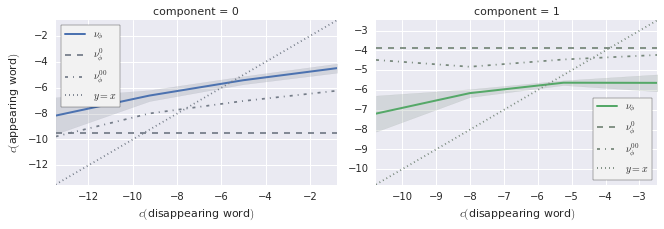

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1403 (cluster-unique) substitutions, but the PCA is in fact computed on 1140 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 893 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.03883431038989871

intercept                      6.227704
global_aoa                    -0.003804
global_clustering             -0.038345
global_frequency               0.252878
global_letters_count          -0.001389
global_orthographic_density   -0.027351
global_synonyms_count          0.073722
dtype: float64

Regressing global frequency with 893 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.057806765532471216

intercept                                              17.550110
global_aoa                                             -0.367816
global_clustering                                       1.008030
global_frequency                                       -0.127717
global_letters_count                                   -1.559120
global_orthographic_density                            -1.330171
glob

Regressing global frequency with 893 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.044807032632144805

intercept                                        9.259479
rel_aoa                                          0.001921
rel_clustering                                   0.056817
rel_frequency                                    0.174944
rel_letters_count                                0.055623
rel_orthographic_density                        -0.089660
rel_synonyms_count                               0.366414
rel_aoa * rel_clustering                         0.006759
rel_aoa * rel_frequency                          0.028779
rel_aoa * rel_letters_count                      0.039126
rel_aoa * rel_orthographic_density              -0.004192
rel_aoa * rel_synonyms_count                     0.068206
rel_clustering * rel_frequency                  -0.024476
rel_clustering * rel_letters_count              -0.096484
rel_clustering * rel_orthographic_density        0.007595
rel_clust

intercept                      4.769943
global_aoa                    -0.036050
global_clustering              0.084806
global_frequency              -0.653443
global_letters_count           0.204173
global_orthographic_density    0.263861
global_synonyms_count          0.006191
rel_aoa                        0.023954
rel_clustering                -0.085728
rel_frequency                  0.938897
rel_letters_count             -0.203354
rel_orthographic_density      -0.279502
rel_synonyms_count             0.054442
dtype: float64

Regressing rel frequency with 893 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.32413930366156374

intercept                                                -16.182734
global_aoa                                                -0.494135
global_clustering                                         -6.895821
global_frequency                                          -0.260953
global_letters_count                                      -1.742548
global_ort

Regressing global aoa with 825 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.017611575312532657

intercept                   6.556888
rel_aoa                    -0.012326
rel_clustering              0.069465
rel_frequency              -0.048028
rel_letters_count           0.010711
rel_orthographic_density   -0.293941
rel_synonyms_count         -0.231003
dtype: float64

Regressing global aoa with 825 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.04901687531706511

intercept                                        6.614042
rel_aoa                                         -0.130086
rel_clustering                                  -0.107764
rel_frequency                                   -0.066691
rel_letters_count                               -0.119746
rel_orthographic_density                        -0.701687
rel_synonyms_count                              -0.726171
rel_aoa * rel_clustering                        -0.122602
rel_aoa * rel_frequency                       

Regressing rel aoa with 825 measures, no interactions
           ^^^^^^^
R^2 = 0.15066065145370222

intercept                      3.911236
global_aoa                    -0.352379
global_clustering              0.164890
global_frequency               0.018675
global_letters_count           0.051665
global_orthographic_density   -0.267105
global_synonyms_count          0.259643
rel_aoa                        0.654624
rel_clustering                -0.204865
rel_frequency                 -0.087535
rel_letters_count             -0.078585
rel_orthographic_density       0.165232
rel_synonyms_count            -0.462299
dtype: float64

Regressing rel aoa with 825 measures, with interactions
           ^^^^^^^
R^2 = 0.22537192842698428

intercept                                                 16.049504
global_aoa                                                -0.499592
global_clustering                                          4.327838
global_frequency                                          

Regressing global clustering with 735 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0011641681114800129

intercept                  -5.781522
rel_aoa                     0.007020
rel_clustering              0.029615
rel_frequency               0.009454
rel_letters_count           0.002007
rel_orthographic_density    0.011292
rel_synonyms_count          0.006853
dtype: float64

Regressing global clustering with 735 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.03376713654776564

intercept                                       -5.838143
rel_aoa                                         -0.005692
rel_clustering                                   0.073236
rel_frequency                                   -0.041759
rel_letters_count                                0.001892
rel_orthographic_density                         0.045865
rel_synonyms_count                              -0.111403
rel_aoa * rel_clustering                        -0.011716
rel_aoa * rel_fre

Regressing global clustering with 735 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.16467629453640253

intercept                                                -3.105931
global_aoa                                                0.736708
global_clustering                                         2.589866
global_frequency                                         -0.333054
global_letters_count                                      2.538438
global_orthographic_density                               0.057794
global_synonyms_count                                    -3.590216
rel_aoa                                                  -0.397110
rel_clustering                                           -3.357636
rel_frequency                                            -0.520579
rel_letters_count                                        -1.866890
rel_orthographic_density                                  0.414645
rel_synonyms_count                                        0.136938
global_

Regressing rel letters_count with 893 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0482178933733598

intercept                                             -16.658596
global_aoa                                              0.950016
global_clustering                                      -1.784778
global_frequency                                        1.400607
global_letters_count                                    1.165452
global_orthographic_density                            -0.010732
global_synonyms_count                                   2.163901
global_aoa * global_clustering                          0.038753
global_aoa * global_frequency                          -0.030581
global_aoa * global_letters_count                      -0.059912
global_aoa * global_orthographic_density               -0.001958
global_aoa * global_synonyms_count                     -0.162311
global_clustering * global_frequency                    0.131376
global_clustering * global_letters

Regressing global letters_count with 893 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12452629415511596

intercept                                                 28.683569
global_aoa                                                 0.381699
global_clustering                                          6.323376
global_frequency                                           0.335846
global_letters_count                                      -2.565354
global_orthographic_density                               -1.073827
global_synonyms_count                                     -4.854058
rel_aoa                                                    0.775105
rel_clustering                                           -12.554860
rel_frequency                                              2.059967
rel_letters_count                                          3.766512
rel_orthographic_density                                  -1.030766
rel_synonyms_count                                      

intercept                      0.091412
global_aoa                    -0.000465
global_clustering              0.021814
global_frequency              -0.000442
global_letters_count           0.006666
global_orthographic_density    0.014198
global_synonyms_count          0.046104
dtype: float64

Regressing rel synonyms_count with 864 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.017957620389255857

intercept                                             -0.208640
global_aoa                                             0.167552
global_clustering                                      0.254110
global_frequency                                      -0.022580
global_letters_count                                   0.170519
global_orthographic_density                            0.215352
global_synonyms_count                                 -0.650602
global_aoa * global_clustering                         0.009265
global_aoa * global_frequency                          0.002696
glo

Regressing global synonyms_count with 864 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.011980133381401692

intercept                      1.045260
global_aoa                     0.004960
global_clustering              0.042195
global_frequency              -0.013936
global_letters_count          -0.033153
global_orthographic_density   -0.088996
global_synonyms_count          0.145427
rel_aoa                       -0.015441
rel_clustering                -0.028952
rel_frequency                  0.018281
rel_letters_count              0.042868
rel_orthographic_density       0.116247
rel_synonyms_count            -0.096096
dtype: float64

Regressing global synonyms_count with 864 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.0816456088481361

intercept                                                 5.119818
global_aoa                                                0.227672
global_clustering                                         1.329771
globa

Regressing global orthographic_density with 730 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08086569102341157

intercept                                              9.712993
global_aoa                                            -0.567442
global_clustering                                      0.826598
global_frequency                                      -0.407836
global_letters_count                                  -0.581165
global_orthographic_density                            0.029255
global_synonyms_count                                  0.455086
global_aoa * global_clustering                        -0.014086
global_aoa * global_frequency                          0.022028
global_aoa * global_letters_count                      0.026386
global_aoa * global_orthographic_density               0.041180
global_aoa * global_synonyms_count                     0.045250
global_clustering * global_frequency                  -0.036667
global_clustering * global

Regressing rel orthographic_density with 730 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.0863104015690086

intercept                                       -0.619932
rel_aoa                                          0.074022
rel_clustering                                   0.070550
rel_frequency                                    0.032053
rel_letters_count                               -0.025186
rel_orthographic_density                         0.333993
rel_synonyms_count                               0.227011
rel_aoa * rel_clustering                         0.031087
rel_aoa * rel_frequency                          0.022414
rel_aoa * rel_letters_count                      0.020007
rel_aoa * rel_orthographic_density               0.046611
rel_aoa * rel_synonyms_count                     0.092842
rel_clustering * rel_frequency                  -0.029371
rel_clustering * rel_letters_count              -0.044411
rel_clustering * rel_orthographic_density       -0.00